In [1]:
# teff= 11500-1600, logg=8.05-8.15 #zz Ceti? #ltt 560

In [1]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle
from astropy.io import fits
import pandas as pd

In [2]:
search_result = lk.search_lightcurvefile("LTT 560")
search_result

gzip was not found on your system! You should solve this issue for astroquery.eso to be at its best!
On POSIX system: make sure gzip is installed and in your path!On Windows: same for 7-zip (http://www.7-zip.org)!


SearchResult containing 1 data products.

 #   observation   target_name                     productFilename                     distance
--- -------------- ----------- ------------------------------------------------------- --------
  0 TESS Sector 30    63836616 tess2020266004630-s0030-0000000063836616-0195-s_lc.fits      0.0

In [3]:
lc = search_result[0].download().PDCSAP_FLUX.remove_nans()
sec3 = lc.flux
sec3t = lc.time
sec3e = lc.flux_err
sec3e = sec3e/np.mean(sec3)
sec3 = (sec3/np.mean(sec3))-1

(-0.1, 0.1)

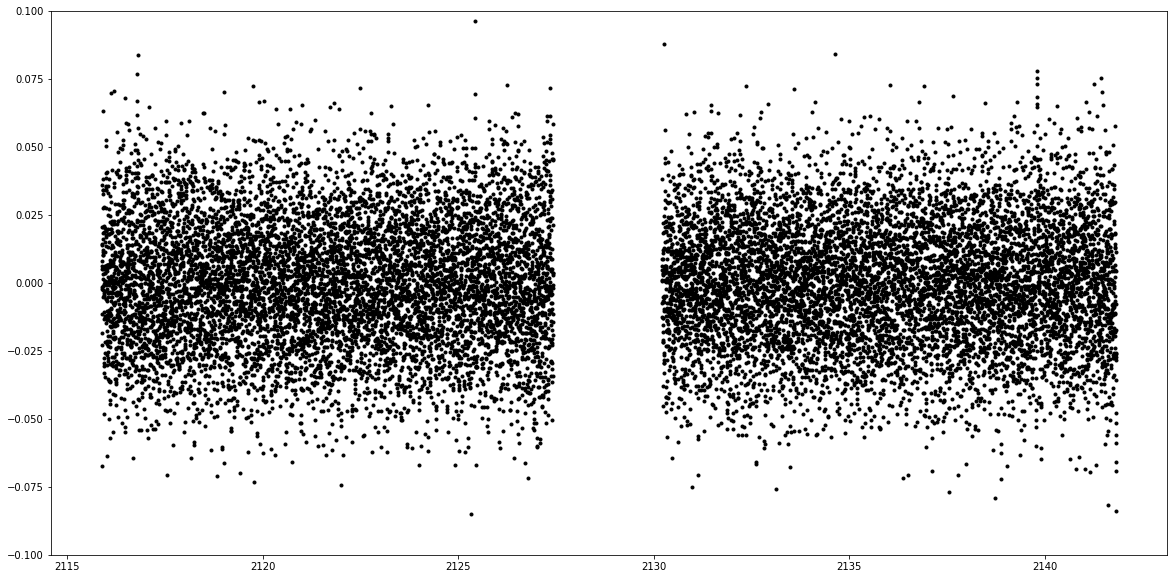

In [4]:
plt.figure(figsize=(20,10))
plt.plot(sec3t, sec3, 'k.')
plt.ylim(-0.1, 0.1)

13.566356635663567


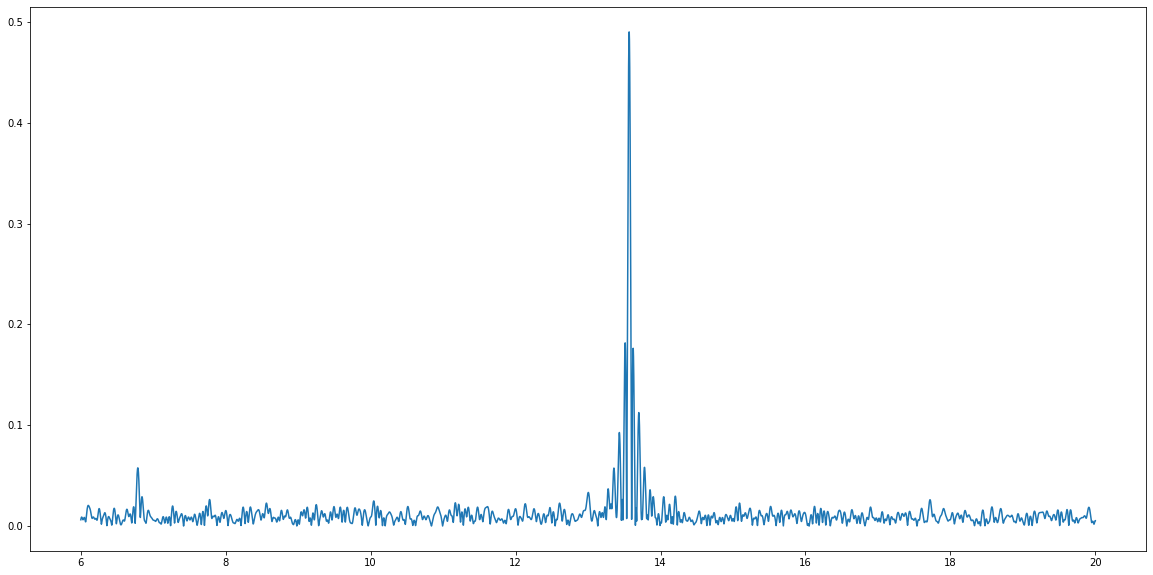

In [6]:
freq = np.linspace(6,20,10000)
powerPl = LombScargle(sec3t,sec3).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,np.sqrt(powerPl))
print(freq[np.argmax(powerPl)])
plt.show()

In [25]:
13.566356635663567*2

27.132713271327134

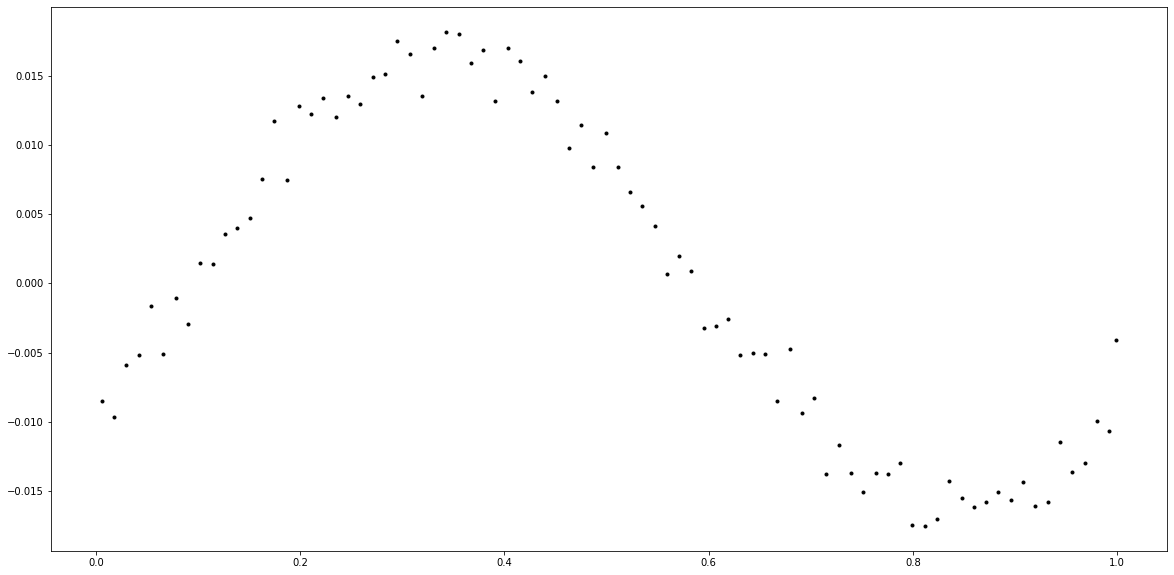

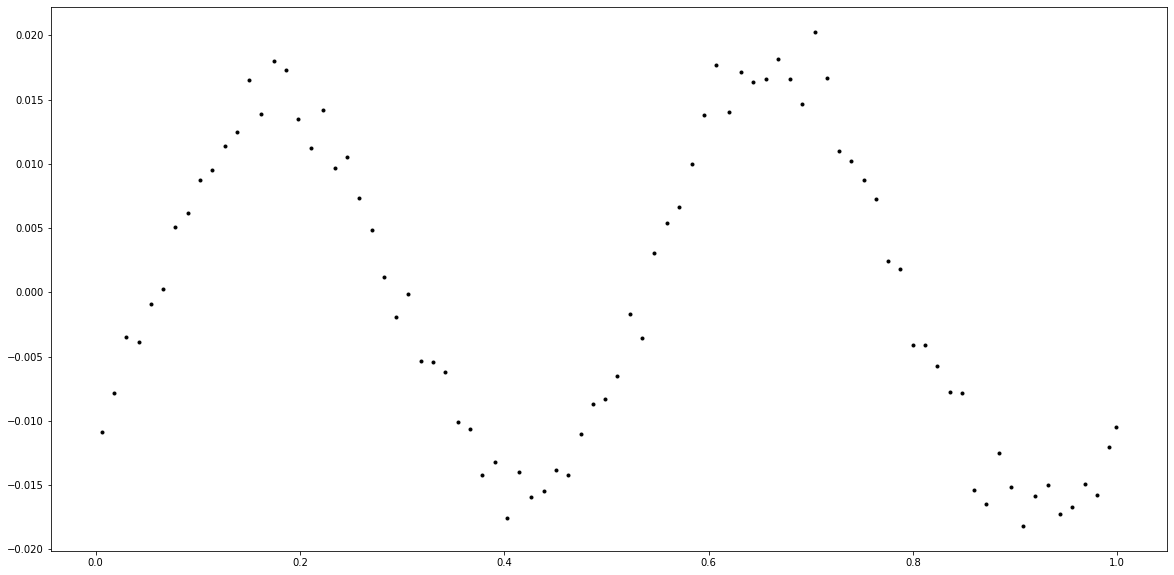

In [22]:
totalPhase = foldMeth(sec3t, 0.07370904131804946)
sortIndi = np.argsort(totalPhase)
totalPhase = totalPhase[sortIndi]
totalFluxS = sec3[sortIndi]
npoint = 200
totalFluxS = np.nanmean(np.pad(totalFluxS.astype(float), (0, npoint - totalFluxS.size%npoint), mode='constant', constant_values=np.NaN).reshape(-1, npoint), axis=1)
totalPhase = np.nanmean(np.pad(totalPhase.astype(float), (0, npoint - totalPhase.size%npoint), mode='constant', constant_values=np.NaN).reshape(-1, npoint), axis=1)
plt.figure(figsize=(20,10))
plt.plot(totalPhase,totalFluxS,'k.')
plt.show()


totalPhase = foldMeth(sec3t, 2*0.07370904131804946)
sortIndi = np.argsort(totalPhase)
totalPhase = totalPhase[sortIndi]
totalFluxS = sec3[sortIndi]
npoint = 200
totalFluxS = np.nanmean(np.pad(totalFluxS.astype(float), (0, npoint - totalFluxS.size%npoint), mode='constant', constant_values=np.NaN).reshape(-1, npoint), axis=1)
totalPhase = np.nanmean(np.pad(totalPhase.astype(float), (0, npoint - totalPhase.size%npoint), mode='constant', constant_values=np.NaN).reshape(-1, npoint), axis=1)
plt.figure(figsize=(20,10))
plt.plot(totalPhase,totalFluxS,'k.')
plt.show()

In [18]:
(1/13.566856685668567)

0.07370904131804946

In [16]:
24*(1/13.566856685668567*2)

3.5380339832663745

In [4]:
arcs = 7.4678/1000
15.50 - 5 * np.log10(133.90824606979297/10)

9.865963391551592

In [3]:
arcs = 7.4678/1000
1/arcs

133.90824606979297

In [20]:
def foldMeth(timeArray, period):
    phases = []
    for el in timeArray:
        passed = int(el/period)
        leftover = el - (passed*period)
        phase = leftover/period
        phases.append(phase)
    return np.array(phases)
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [9]:
search_result = lk.search_lightcurvefile("GD 1400")
search_result

SearchResult containing 3 data products.

 #   observation   target_name                       productFilename                        distance
--- -------------- ----------- ------------------------------------------------------------ --------
  0  TESS Sector 3   164772507      tess2018263035959-s0003-0000000164772507-0123-s_lc.fits      0.0
  1 TESS Sector 30   164772507 tess2020266004630-s0030-0000000164772507-0195-a_fast-lc.fits      0.0
  2 TESS Sector 30   164772507      tess2020266004630-s0030-0000000164772507-0195-s_lc.fits      0.0

In [10]:
lc = search_result[0].download().PDCSAP_FLUX.remove_nans()
sec3 = lc.flux
sec3t = lc.time
sec3e = lc.flux_err
sec3e = sec3e/np.mean(sec3)
sec3 = (sec3/np.mean(sec3))-1
lc = search_result[1].download().PDCSAP_FLUX.remove_nans()
secF = lc.flux
secFt = lc.time
secFe = lc.flux_err
secFe = secFe/np.mean(secF)
secF = (secF/np.mean(secF))-1
lc = search_result[2].download().PDCSAP_FLUX.remove_nans()
sec30 = lc.flux
sec30t = lc.time
sec30e = lc.flux_err
sec30e = sec30e/np.mean(sec30)
sec30 = (sec30/np.mean(sec30))-1

119.71213121312131


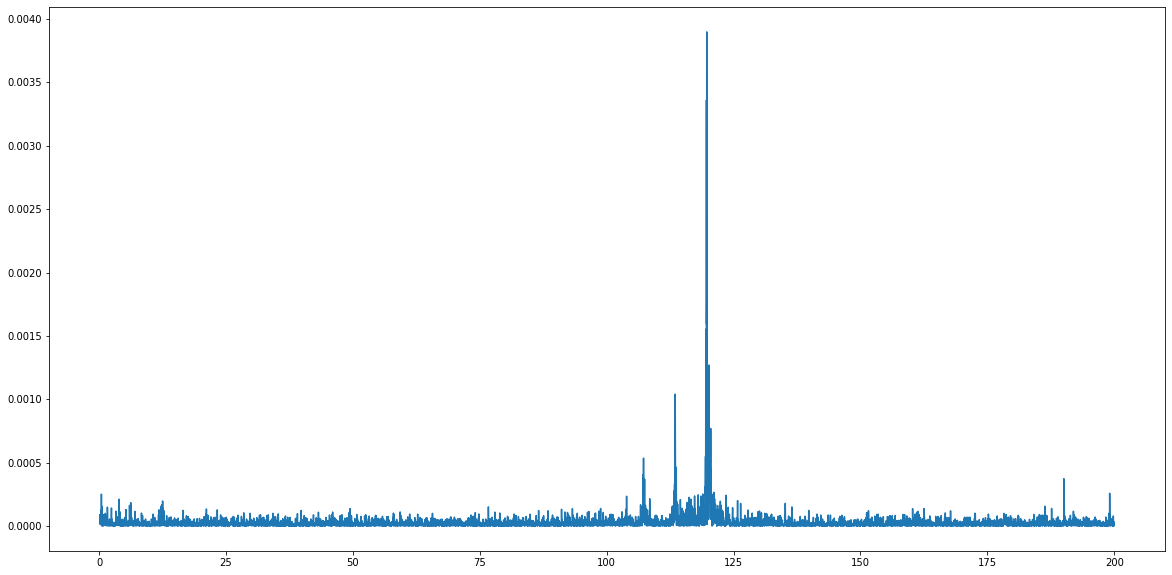

119.7220522052205


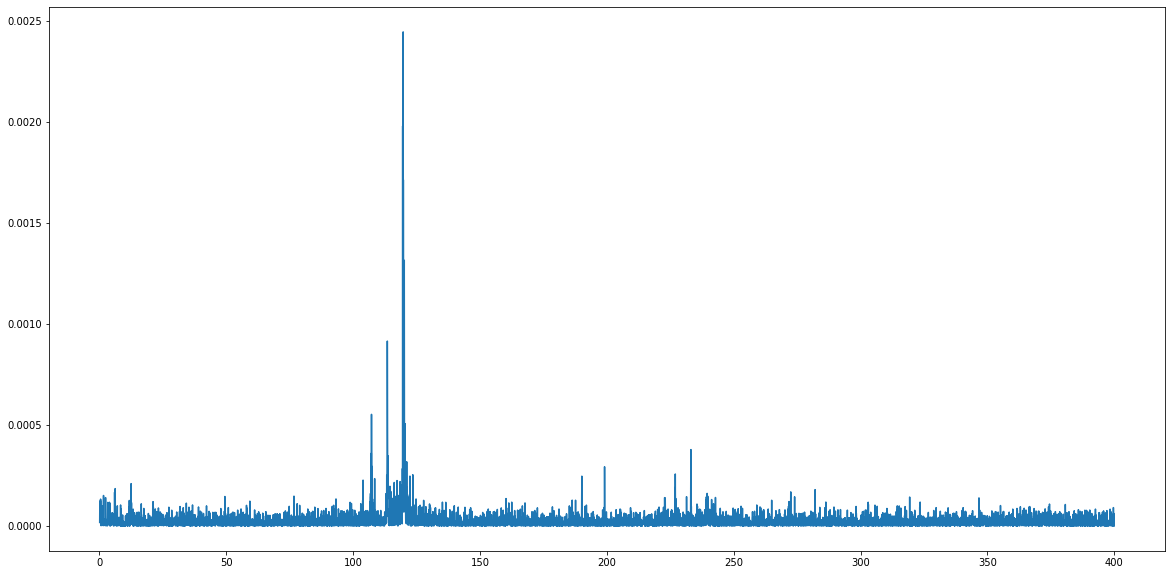

In [11]:
freq = np.linspace(0.1,200,10000)
powerPl = LombScargle(secFt,secF).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,powerPl)
print(freq[np.argmax(powerPl)])
plt.show()

freq = np.linspace(0.1,400,10000)
powerPl = LombScargle(secFt,secF).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,powerPl)
print(freq[np.argmax(powerPl)])
#plt.savefig('GD1400Fast.pdf')

1385.5160516051606


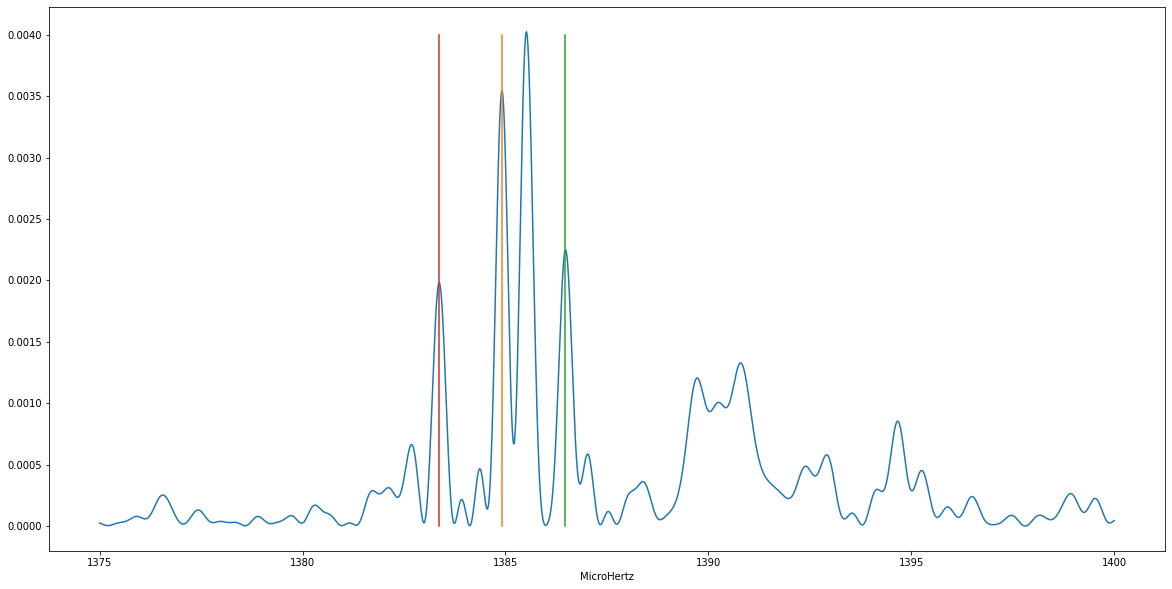

1313.6473647364737


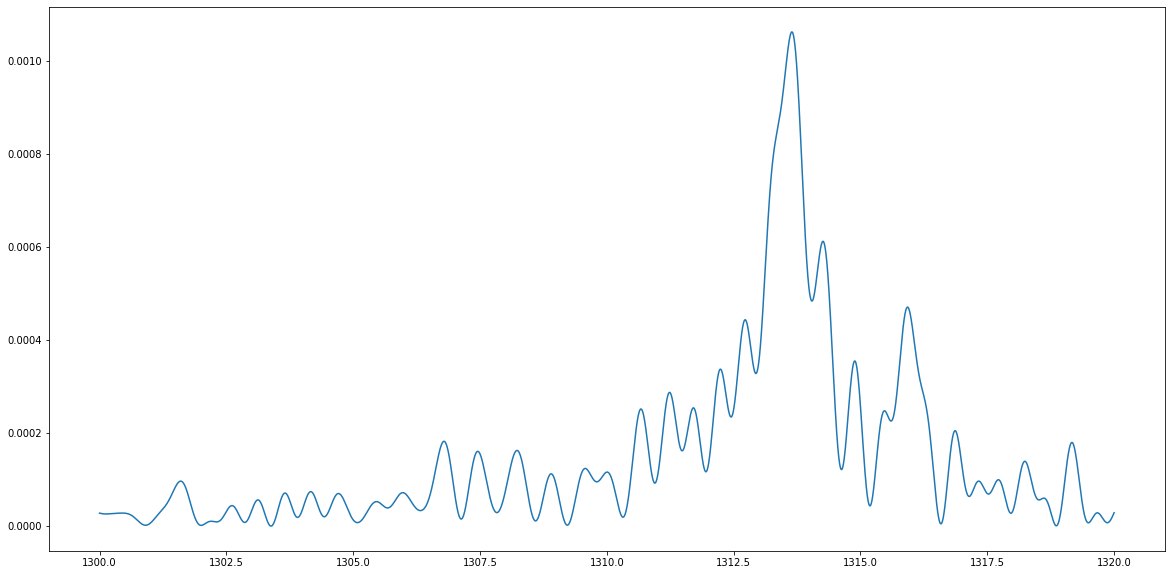

1385.4485448544856


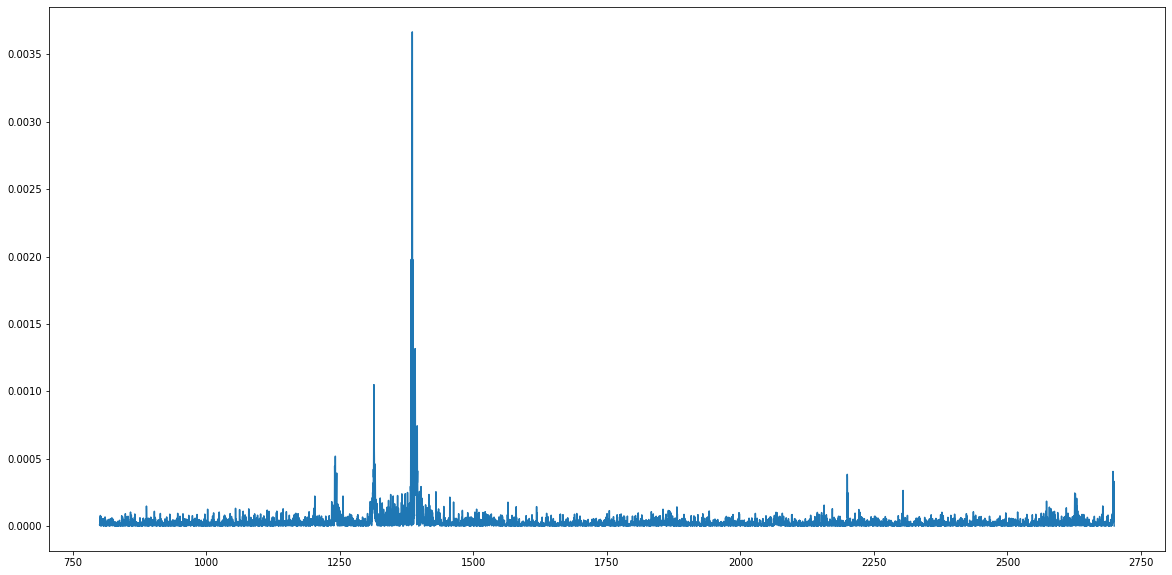

In [40]:
secFtUp = (secFt*24*60*60)/1000000
freq = np.linspace(1375,1400,10000)
powerPl = LombScargle(secFtUp,secF).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,powerPl)
print(freq[np.argmax(powerPl)])
plt.xlabel('MicroHertz')
goldFreq = 1384.90516051606
goldDel = 1.55
plt.plot([goldFreq,goldFreq],[0,0.004])
plt.plot([goldFreq+goldDel,goldFreq+goldDel],[0,0.004])
plt.plot([goldFreq-goldDel,goldFreq-goldDel],[0,0.004])
plt.show()

secFtUp = (secFt*24*60*60)/1000000
freq = np.linspace(1300,1320,10000)
powerPl = LombScargle(secFtUp,secF).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,powerPl)
print(freq[np.argmax(powerPl)])
plt.show()
#plt.savefig('GD1400Fast.pdf')

secFtUp = (secFt*24*60*60)/1000000
freq = np.linspace(800,2700,10000)
powerPl = LombScargle(secFtUp,secF).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,powerPl)
print(freq[np.argmax(powerPl)])

plt.show()

191.34346434643464


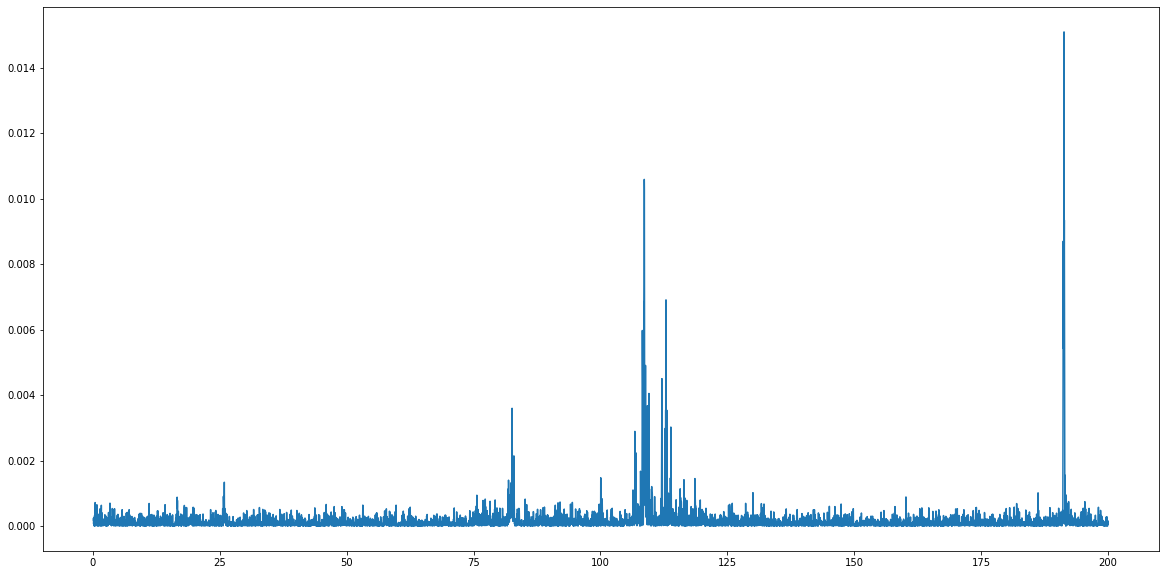

207.9888088808881


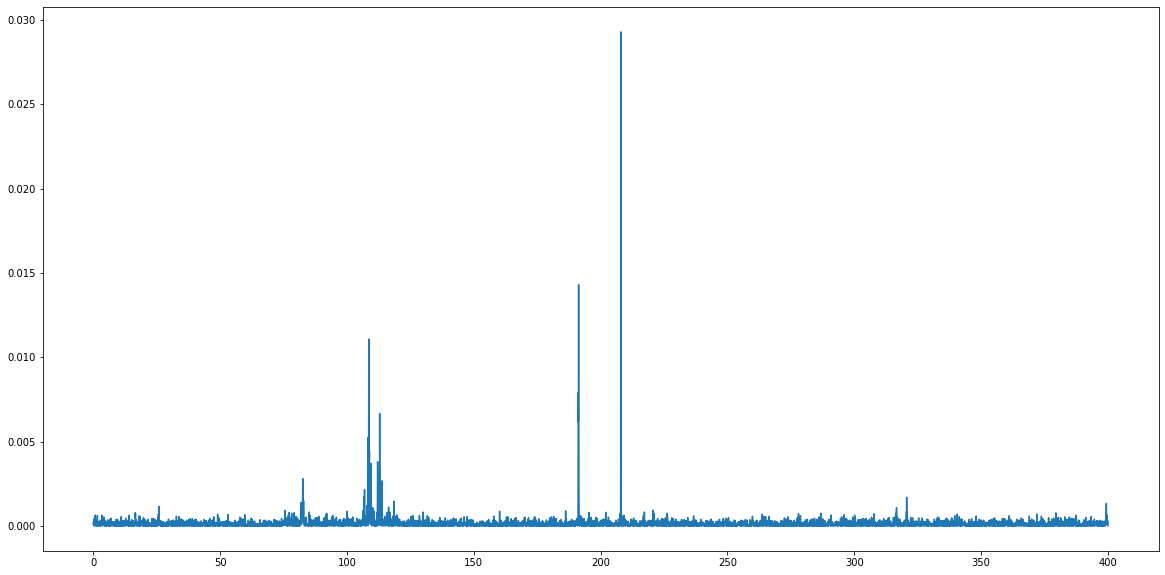

In [7]:
freq = np.linspace(0.1,200,10000)
powerPl = LombScargle(sec3t,sec3).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,powerPl)
print(freq[np.argmax(powerPl)])
plt.show()
freq = np.linspace(0.1,400,10000)
powerPl = LombScargle(sec3t,sec3).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,powerPl)
print(freq[np.argmax(powerPl)])
plt.savefig('GD1400Slow.pdf')

119.71213121312131


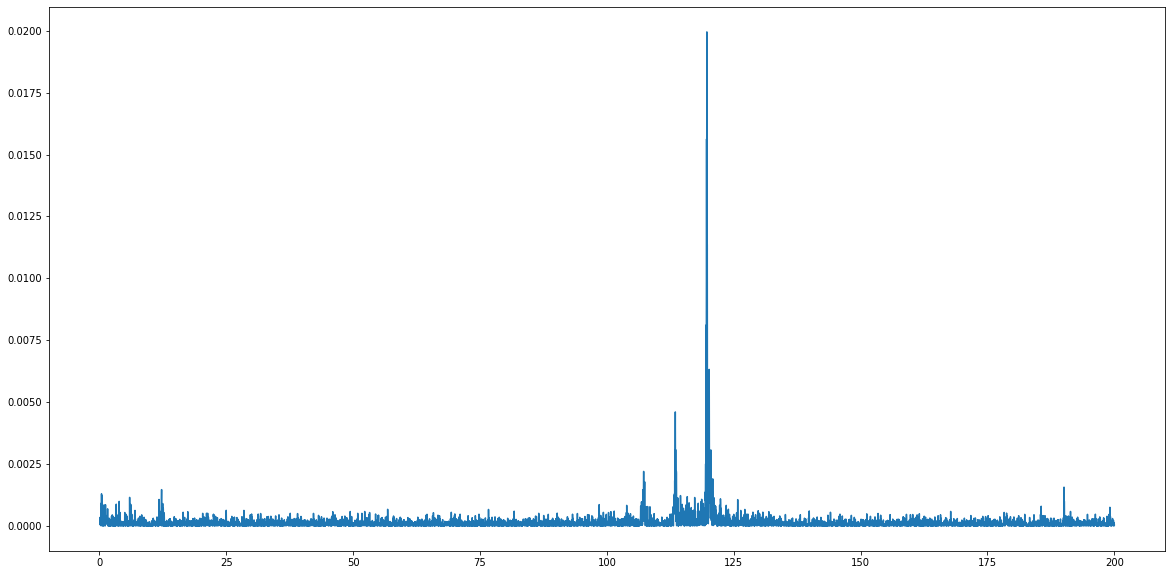

In [54]:
freq = np.linspace(0.1,200,10000)
powerPl = LombScargle(sec30t,sec30).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,powerPl)
print(freq[np.argmax(powerPl)])

119.70936209362092


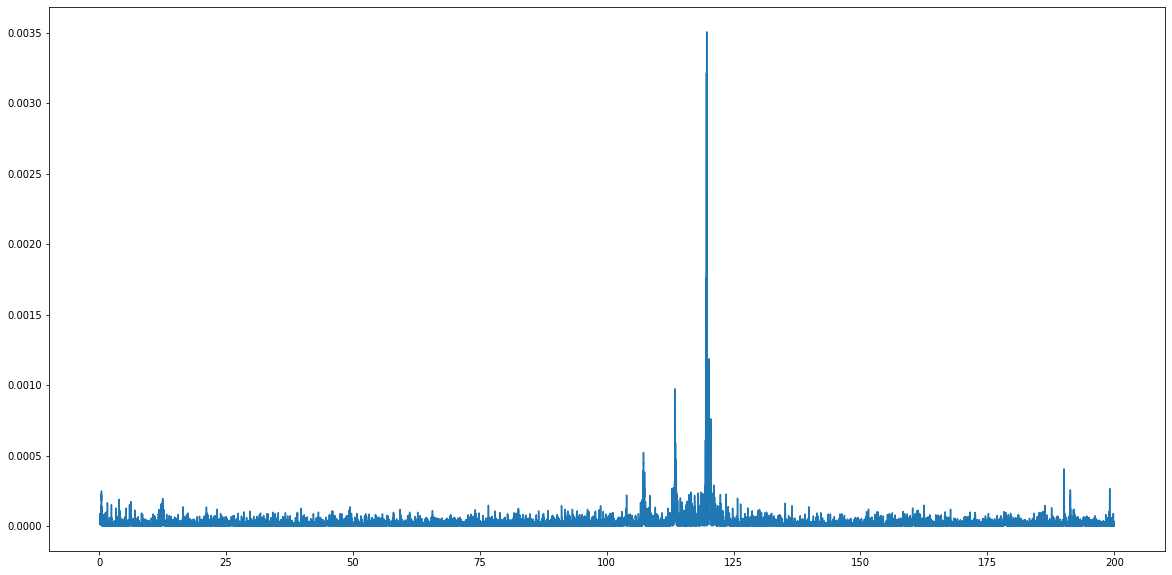

In [5]:
totalTime = np.append(sec3t,secFt)
totalFlux = np.append(sec3,secF)
freq = np.linspace(0.1,200,100000)
powerPl = LombScargle(totalTime,totalFlux).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,powerPl)

print(freq[np.argmax(powerPl)])

0.4422834228342283


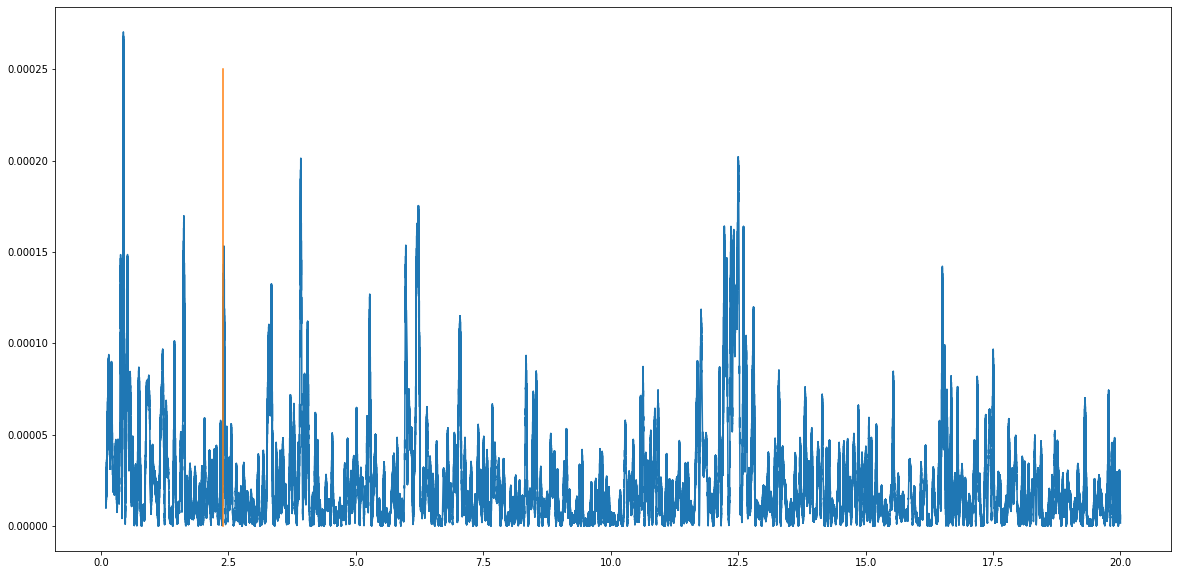

In [12]:
freq = np.linspace(0.1,20,100000)
powerPl = LombScargle(totalTime,totalFlux).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,powerPl)
print(freq[np.argmax(powerPl)])
plt.plot([1/0.4158,1/0.4158],[0,0.00025])

In [49]:

dat = np.array([totalTime, totalFlux])

dat = dat.T

np.savetxt('GD1400Tess.dat', dat, delimiter = '\t')

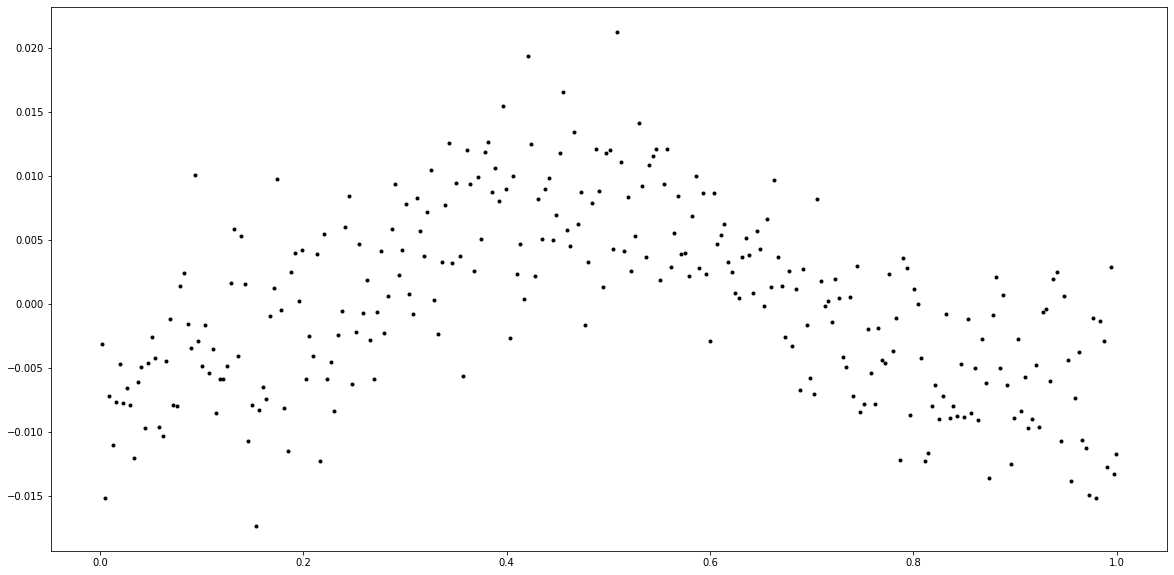

In [61]:
totalPhase = foldMeth(totalTime, 1/119.70936209362092)
sortIndi = np.argsort(totalPhase)
totalPhase = totalPhase[sortIndi]
totalFluxS = totalFlux [sortIndi]
npoint = 400
totalFluxS = np.nanmean(np.pad(totalFluxS.astype(float), (0, npoint - totalFluxS.size%npoint), mode='constant', constant_values=np.NaN).reshape(-1, npoint), axis=1)
totalPhase = np.nanmean(np.pad(totalPhase.astype(float), (0, npoint - totalPhase.size%npoint), mode='constant', constant_values=np.NaN).reshape(-1, npoint), axis=1)
plt.figure(figsize=(20,10))
plt.plot(totalPhase,totalFluxS,'k.')


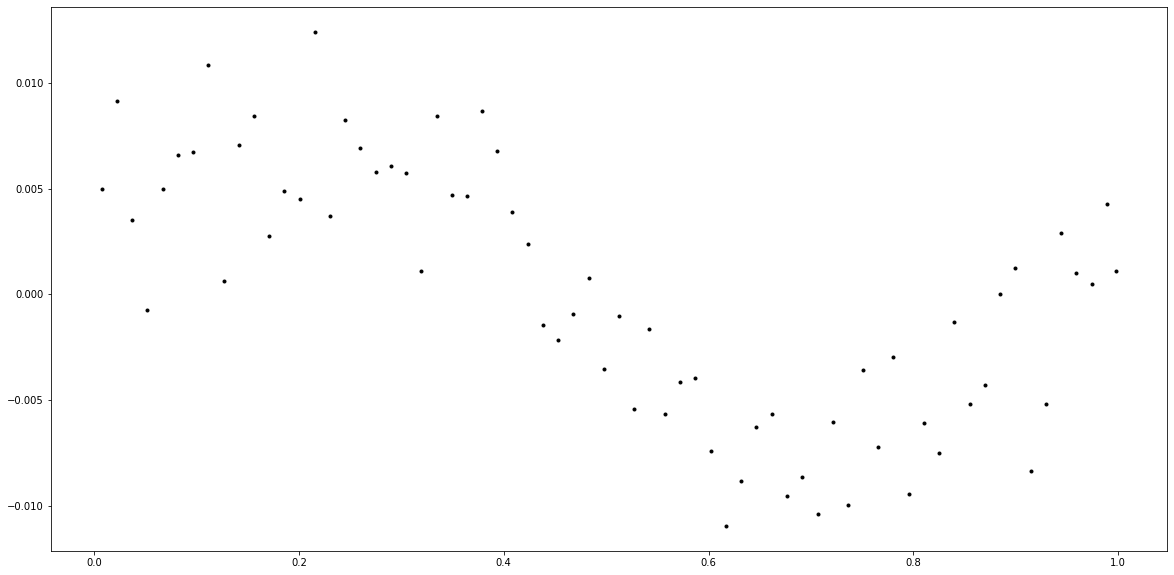

In [64]:
totalPhase = foldMeth(sec3t, 1/191.34346434643464)
sortIndi = np.argsort(totalPhase)
totalPhase = totalPhase[sortIndi]
totalFluxS = sec3[sortIndi]
npoint = 200
totalFluxS = np.nanmean(np.pad(totalFluxS.astype(float), (0, npoint - totalFluxS.size%npoint), mode='constant', constant_values=np.NaN).reshape(-1, npoint), axis=1)
totalPhase = np.nanmean(np.pad(totalPhase.astype(float), (0, npoint - totalPhase.size%npoint), mode='constant', constant_values=np.NaN).reshape(-1, npoint), axis=1)
plt.figure(figsize=(20,10))
plt.plot(totalPhase,totalFluxS,'k.')


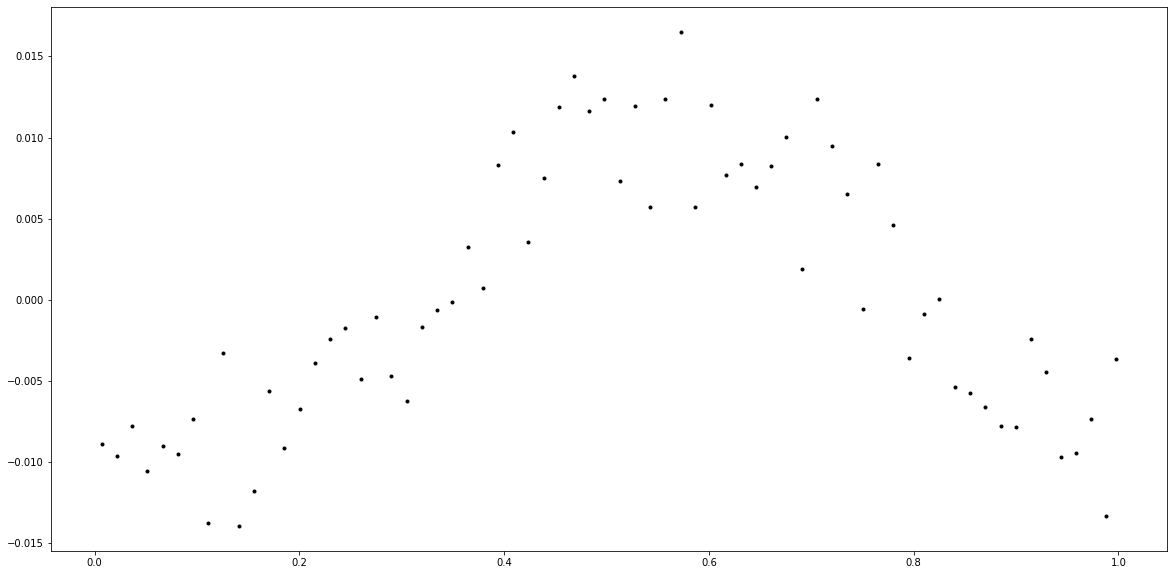

In [19]:


totalPhase = foldMeth(sec3t, 1/207.9888088808881)
sortIndi = np.argsort(totalPhase)
totalPhase = totalPhase[sortIndi]
totalFluxS = sec3[sortIndi]
npoint = 200
totalFluxS = np.nanmean(np.pad(totalFluxS.astype(float), (0, npoint - totalFluxS.size%npoint), mode='constant', constant_values=np.NaN).reshape(-1, npoint), axis=1)
totalPhase = np.nanmean(np.pad(totalPhase.astype(float), (0, npoint - totalPhase.size%npoint), mode='constant', constant_values=np.NaN).reshape(-1, npoint), axis=1)
plt.figure(figsize=(20,10))
plt.plot(totalPhase,totalFluxS,'k.')


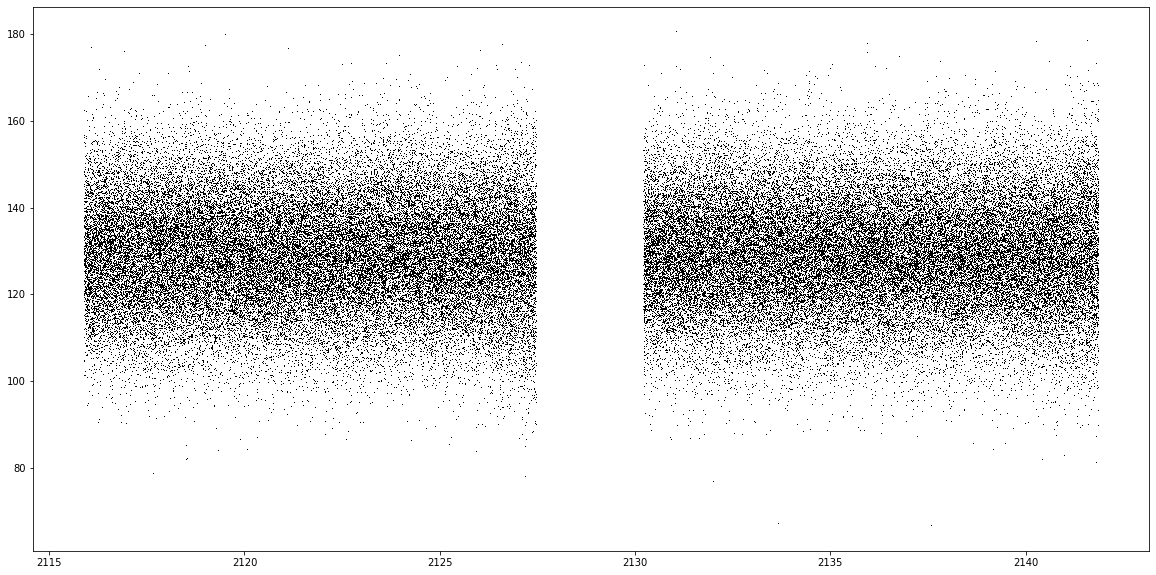

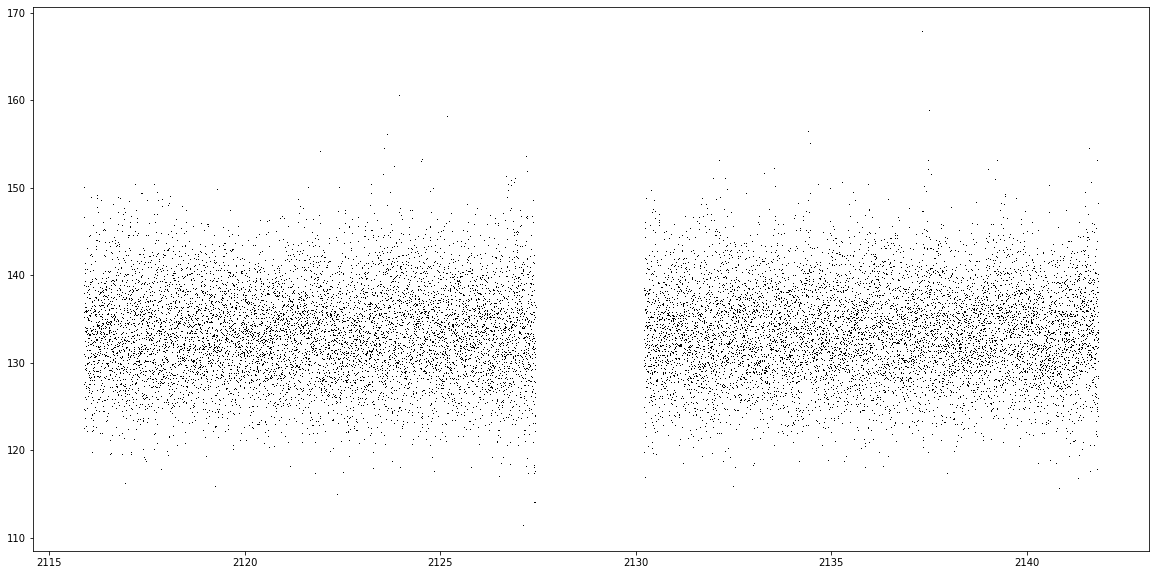

In [42]:
plt.figure(figsize=(20,10))
plt.plot(secFt,secF, 'k,')
plt.show()
plt.figure(figsize=(20,10))
plt.plot(sec30t,sec30, 'k,')

D:\conda\lib\site-packages\lightkurve\collections.py:213: LightkurveWarning: Stitching a `LightCurveFileCollection` which contains both SAP and PDCSAP_FLUX. Using PDCSAP_FLUX. You can remove this warning by explicitely using `LightCurveFileCollection.PDCSAP_FLUX.stitch()`.
  LightkurveWarning)


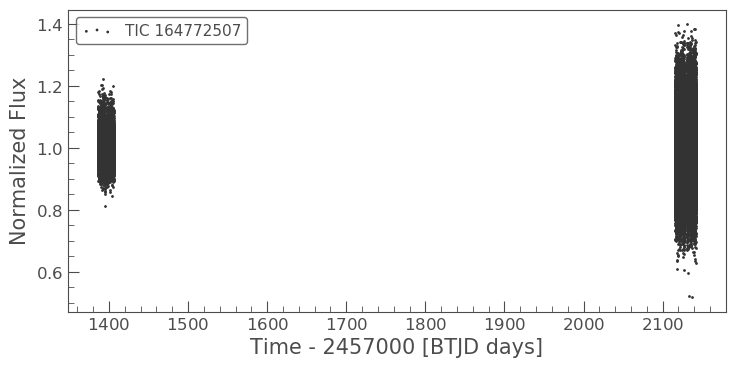

In [10]:
lc = lk.search_lightcurvefile('GD356', sector=25).download().PDCSAP_FLUX.remove_nans()
sec25 = lc.flux
sec25t = lc.time
sec25e = lc.flux_err

search_result = lightkurve.search_lightcurvefile("GD 1400")
lc = search_result.download_all()
lc = lc.stitch()

lc.scatter()


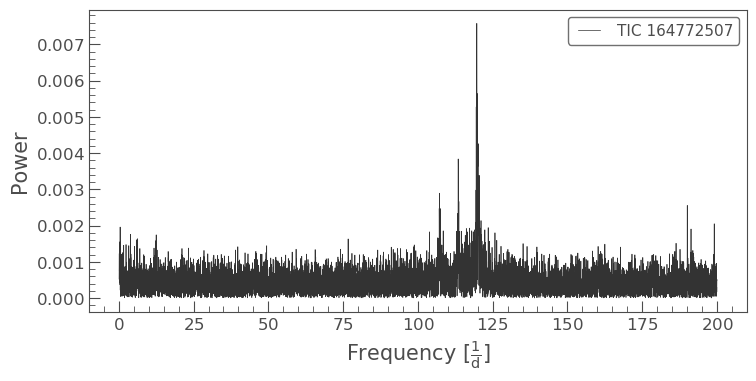

In [24]:
lc = lc.remove_nans()
pg = lc.to_periodogram(maximum_frequency=200, minimum_frequency=0.1,oversample_factor=1)
pg.plot()

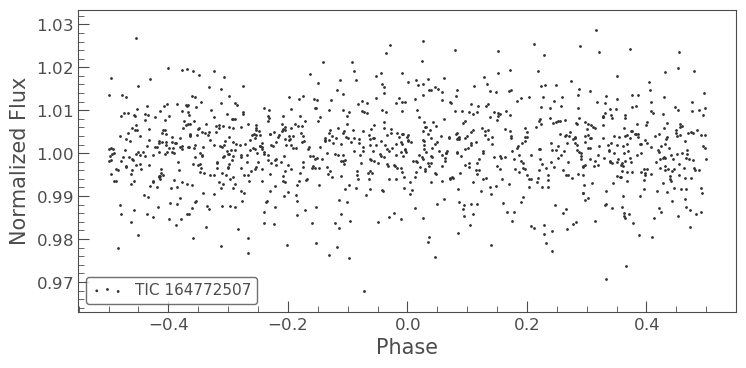

In [27]:
lc.bin(binsize=120).fold(pg.period_at_max_power).scatter()

In [17]:
pg.period_at_max_power

<Quantity 0.0083536 d>

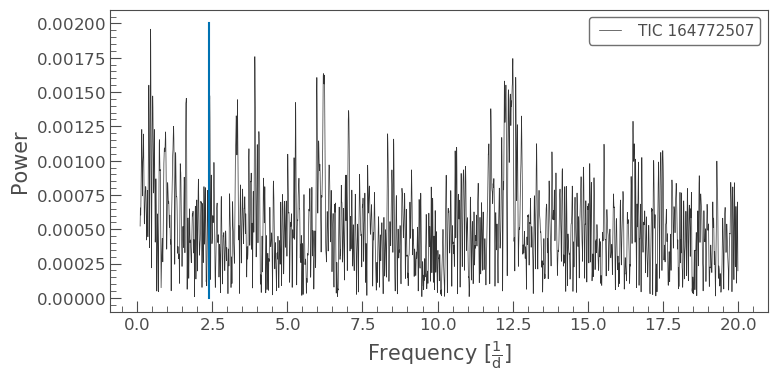

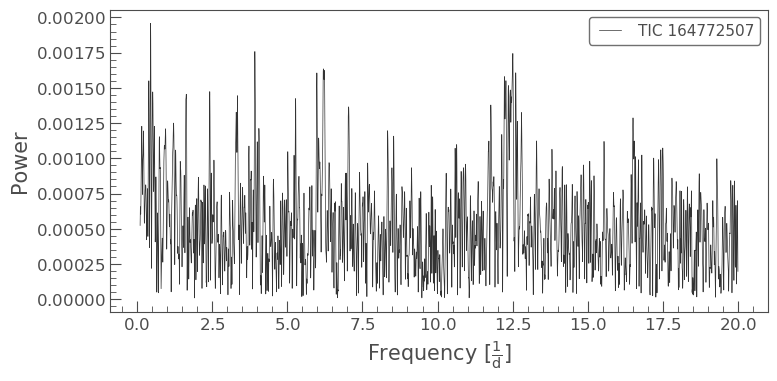

In [23]:
lc = lc.remove_nans()
pg = lc.to_periodogram(maximum_frequency=20, minimum_frequency=0.1,oversample_factor=1)
pg.plot()
plt.plot([1/0.4158,1/0.4158],[0,0.002])
plt.show()
pg.plot()

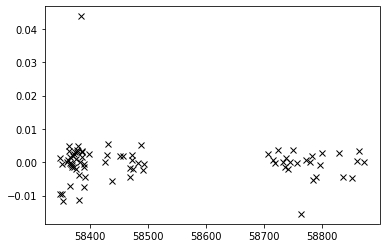

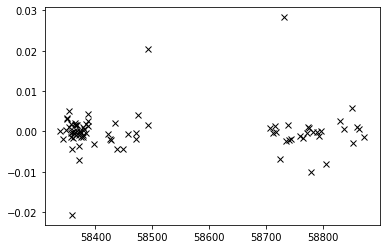

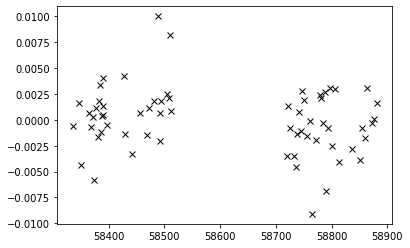

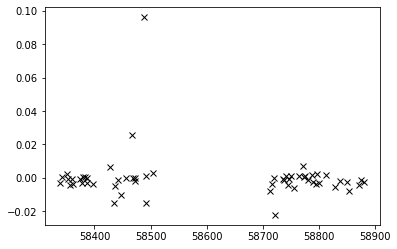

In [93]:

dataZTF = pd.read_csv('GD1400ZTF/1.csv', delimiter=',')
timeZTF1 = dataZTF['mjd']
revFluxZTF1 = dataZTF['mag']
revFluxZTF1 = (revFluxZTF1/np.mean(revFluxZTF1))-1
plt.plot(timeZTF1, revFluxZTF1,'kx')
plt.show()

dataZTF = pd.read_csv('GD1400ZTF/2.csv', delimiter=',')
timeZTF2 = dataZTF['mjd']
revFluxZTF2 = dataZTF['mag']
revFluxZTF2 = (revFluxZTF2/np.mean(revFluxZTF2))-1
plt.plot(timeZTF2, revFluxZTF2,'kx')
plt.show()

dataZTF = pd.read_csv('GD1400ZTF/3.csv', delimiter=',')
timeZTF3 = dataZTF['mjd']
revFluxZTF3 = dataZTF['mag']
revFluxZTF3 = (revFluxZTF3/np.mean(revFluxZTF3))-1
plt.plot(timeZTF3, revFluxZTF3,'kx')
plt.show()

dataZTF = pd.read_csv('GD1400ZTF/4.csv', delimiter=',')
timeZTF4 = dataZTF['mjd']
revFluxZTF4 = dataZTF['mag']
revFluxZTF4 = (revFluxZTF4/np.mean(revFluxZTF4))-1
plt.plot(timeZTF4, revFluxZTF4,'kx')
plt.show()

15.944232442324422


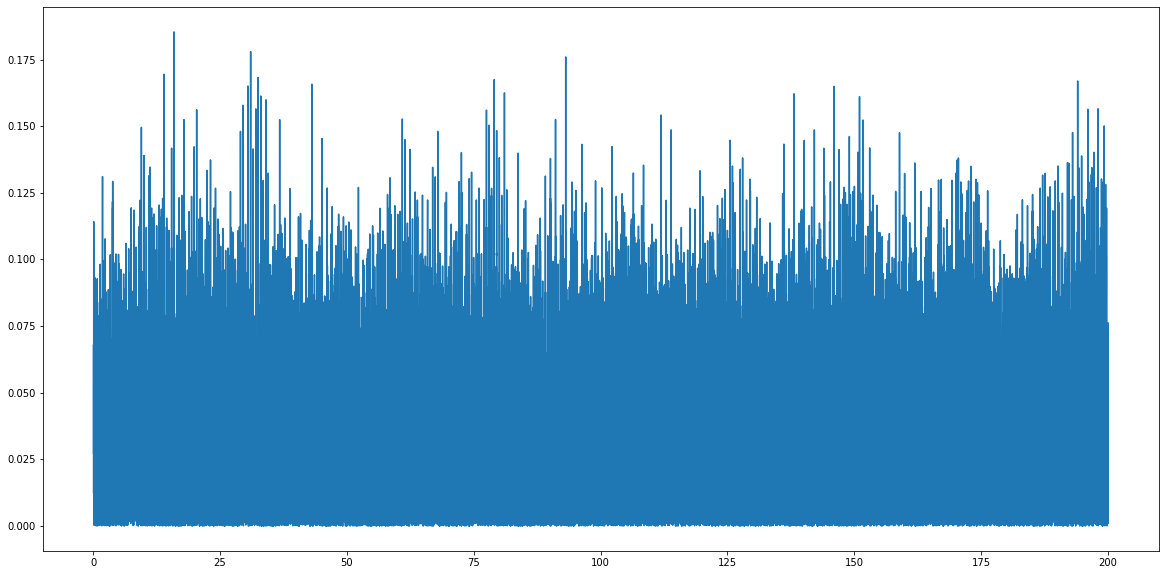

In [94]:
freq = np.linspace(0.1,200,100000)
powerPl = LombScargle(timeZTF1,revFluxZTF1).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,powerPl)
print(freq[np.argmax(powerPl)])

28.25819558195582


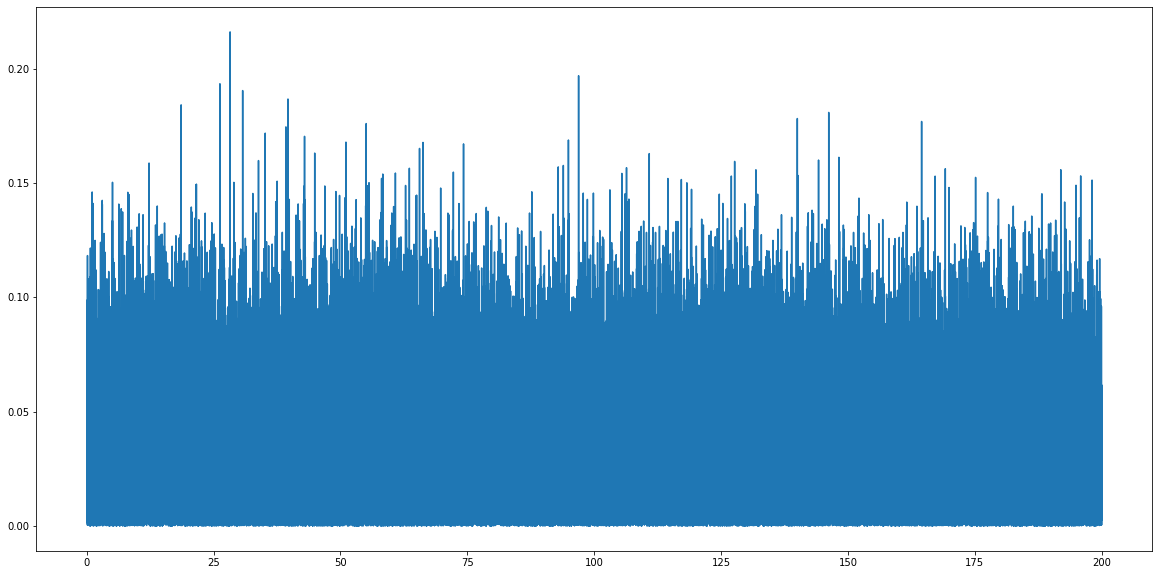

In [95]:
freq = np.linspace(0.1,200,100000)
powerPl = LombScargle(timeZTF2,revFluxZTF2).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,powerPl)
print(freq[np.argmax(powerPl)])

183.97785477854777


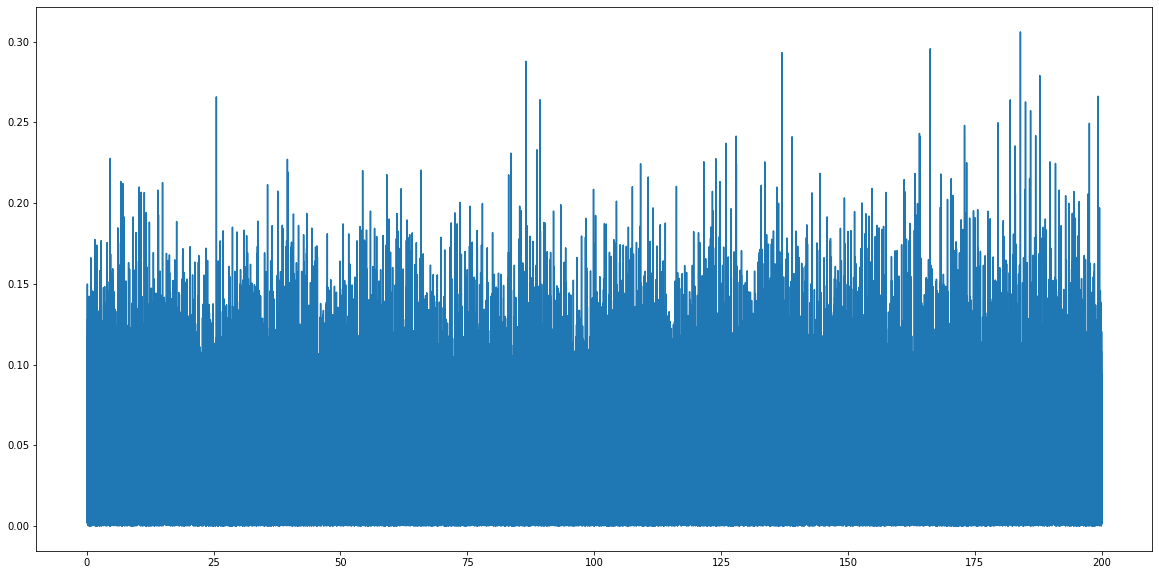

In [96]:
freq = np.linspace(0.1,200,100000)
powerPl = LombScargle(timeZTF3,revFluxZTF3).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,powerPl)
print(freq[np.argmax(powerPl)])

81.84192641926418


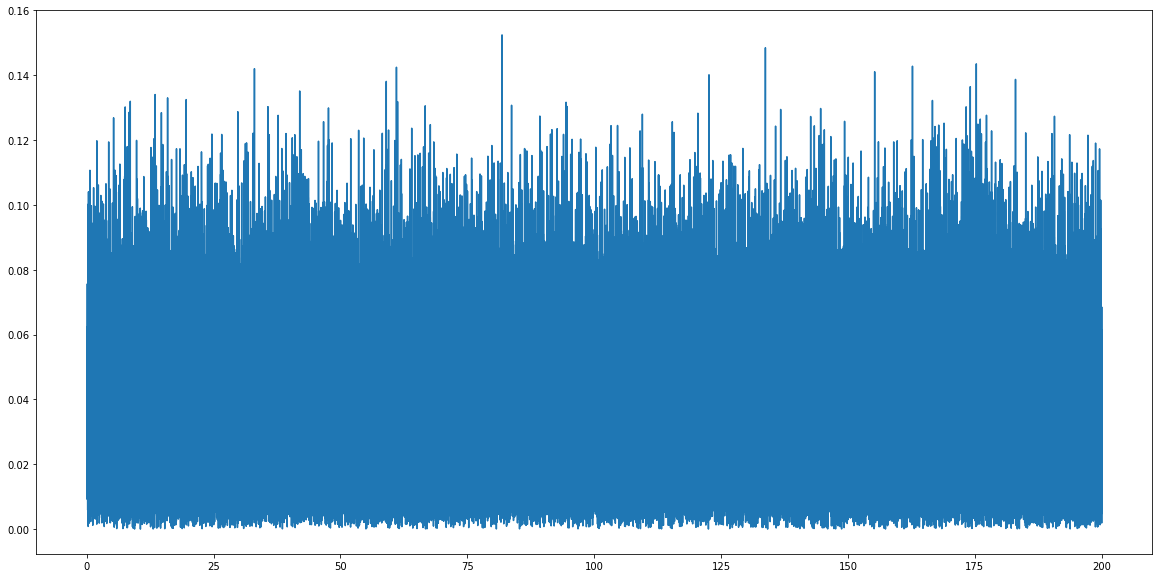

In [97]:
freq = np.linspace(0.1,200,100000)
powerPl = LombScargle(timeZTF4,revFluxZTF4).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,powerPl)
print(freq[np.argmax(powerPl)])

(-0.02, 0.02)

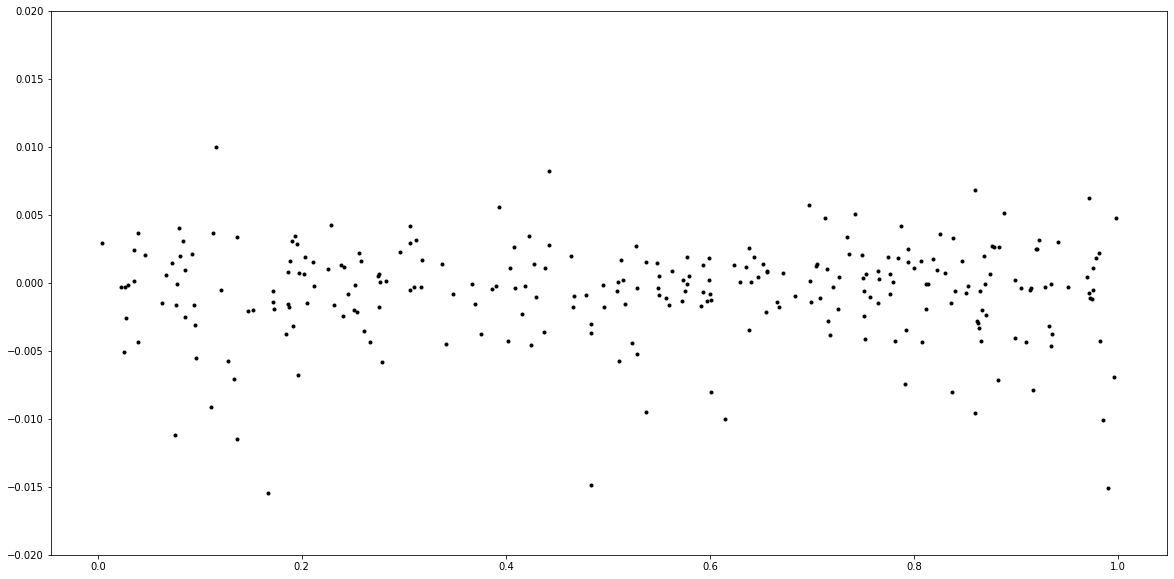

In [100]:
ZTFTotal = np.append(revFluxZTF1,revFluxZTF2)
ZTFTotal = np.append(ZTFTotal,revFluxZTF3)
ZTFTotal = np.append(ZTFTotal,revFluxZTF4)

ZTFTotalT = np.append(timeZTF1,timeZTF2)
ZTFTotalT = np.append(ZTFTotalT,timeZTF3)
ZTFTotalT = np.append(ZTFTotalT,timeZTF4)

totalPhase = foldMeth(ZTFTotalT, 1/119.70936209362092)
sortIndi = np.argsort(totalPhase)
totalPhase = totalPhase[sortIndi]
ZTFTotalS = ZTFTotal[sortIndi]
plt.figure(figsize=(20,10))
plt.plot(totalPhase,ZTFTotalS,'k.')
plt.ylim(-0.02,0.02)

In [4]:
from astropy.io import fits
hdul = fits.open('gd1400.fits')
hdr = hdul[1].header
print(repr(hdr)) 
hdul.close()

XTENSION= 'BINTABLE'           / marks the beginning of a new HDU               
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  100 / length of first array dimension                
NAXIS2  =               118125 / length of second array dimension               
PCOUNT  =                    0 / group parameter count (not used)               
GCOUNT  =                    1 / group count (not used)                         
TFIELDS =                   20 / number of table fields                         
TTYPE1  = 'TIME    '           / column title: data time stamps                 
TFORM1  = 'D       '           / column format: 64-bit floating point           
TUNIT1  = 'BJD - 2457000, days' / column units: Barycenter corrected TESS Julian
TDISP1  = 'D14.7   '           / column display format                          
TTYPE2  = 'TIMECORR'        

gzip was not found on your system! You should solve this issue for astroquery.eso to be at its best!
On POSIX system: make sure gzip is installed and in your path!On Windows: same for 7-zip (http://www.7-zip.org)!


D:\conda\lib\site-packages\lightkurve\search.py:233: LightkurveWarning: Warning: 3 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning)


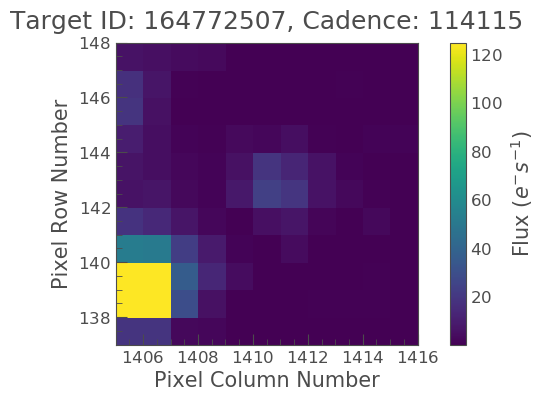

In [7]:
pixels = lk.search_targetpixelfile("GD 1400").download()
pixels.plot()


In [8]:
hdul = fits.open('GD1400Sec3.fits')
hdr = hdul[1].header
print(repr(hdr)) 
hdul.close()

XTENSION= 'BINTABLE'           / marks the beginning of a new HDU               
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  100 / length of first array dimension                
NAXIS2  =                19692 / length of second array dimension               
PCOUNT  =                    0 / group parameter count (not used)               
GCOUNT  =                    1 / group count (not used)                         
TFIELDS =                   20 / number of table fields                         
TTYPE1  = 'TIME    '           / column title: data time stamps                 
TFORM1  = 'D       '           / column format: 64-bit floating point           
TUNIT1  = 'BJD - 2457000, days' / column units: Barycenter corrected TESS Julian
TDISP1  = 'D14.7   '           / column display format                          
TTYPE2  = 'TIMECORR'        

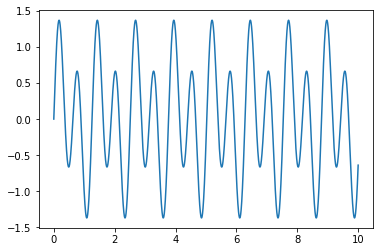

In [12]:
x = np.linspace(0,10,10000)
y = np.sin(10*x)+0.5*np.sin(5*x)
plt.plot(x,y)

D:\conda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


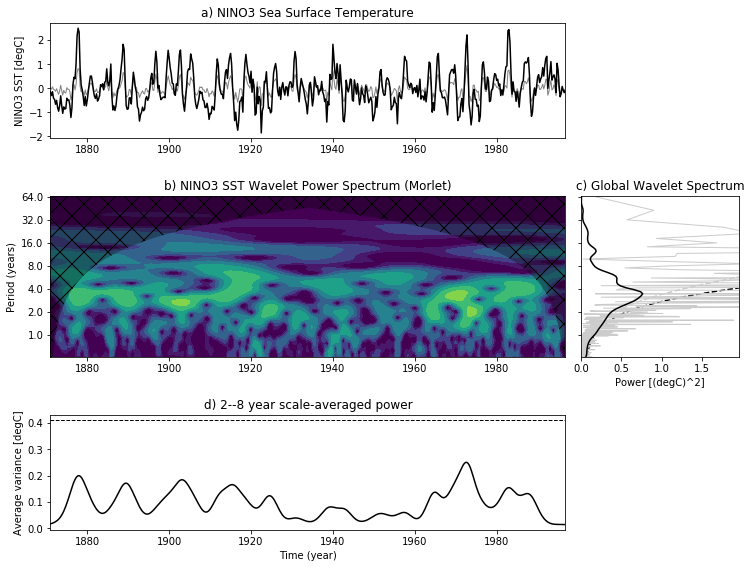

In [41]:
from __future__ import division
import numpy
from matplotlib import pyplot

import pycwt as wavelet
from pycwt.helpers import find

url = 'http://paos.colorado.edu/research/wavelets/wave_idl/nino3sst.txt'
dat = numpy.genfromtxt(url, skip_header=19)
title = 'NINO3 Sea Surface Temperature'
label = 'NINO3 SST'
units = 'degC'
t0 = 1871.0
dt = 0.25  # In years

N = dat.size
t = numpy.arange(0, N) * dt + t0

p = numpy.polyfit(t - t0, dat, 1)
dat_notrend = dat - numpy.polyval(p, t - t0)
std = dat_notrend.std()  # Standard deviation
var = std ** 2  # Variance
dat_norm = dat_notrend / std  # Normalized dataset

mother = wavelet.Morlet(6)
s0 = 2 * dt  # Starting scale, in this case 2 * 0.25 years = 6 months
dj = 1 / 12  # Twelve sub-octaves per octaves
J = 7 / dj  # Seven powers of two with dj sub-octaves
alpha, _, _ = wavelet.ar1(dat)  # Lag-1 autocorrelation for red noise

wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat_norm, dt, dj, s0, J,
                                                      mother)
iwave = wavelet.icwt(wave, scales, dt, dj, mother) * std

power = (numpy.abs(wave)) ** 2
fft_power = numpy.abs(fft) ** 2
period = 1 / freqs

power /= scales[:, None]

signif, fft_theor = wavelet.significance(1.0, dt, scales, 0, alpha,
                                         significance_level=0.95,
                                         wavelet=mother)
sig95 = numpy.ones([1, N]) * signif[:, None]
sig95 = power / sig95

glbl_power = power.mean(axis=1)
dof = N - scales  # Correction for padding at edges
glbl_signif, tmp = wavelet.significance(var, dt, scales, 1, alpha,
                                        significance_level=0.95, dof=dof,
                                        wavelet=mother)

sel = find((period >= 2) & (period < 8))
Cdelta = mother.cdelta
scale_avg = (scales * numpy.ones((N, 1))).transpose()
scale_avg = power / scale_avg  # As in Torrence and Compo (1998) equation 24
scale_avg = var * dj * dt / Cdelta * scale_avg[sel, :].sum(axis=0)
scale_avg_signif, tmp = wavelet.significance(var, dt, scales, 2, alpha,
                                             significance_level=0.95,
                                             dof=[scales[sel[0]],
                                                  scales[sel[-1]]],
                                             wavelet=mother)

# Prepare the figure
pyplot.close('all')
pyplot.ioff()
figprops = dict(figsize=(11, 8), dpi=72)
fig = pyplot.figure(**figprops)

# First sub-plot, the original time series anomaly and inverse wavelet
# transform.
ax = pyplot.axes([0.1, 0.75, 0.65, 0.2])
ax.plot(t, iwave, '-', linewidth=1, color=[0.5, 0.5, 0.5])
ax.plot(t, dat, 'k', linewidth=1.5)
ax.set_title('a) {}'.format(title))
ax.set_ylabel(r'{} [{}]'.format(label, units))

# Second sub-plot, the normalized wavelet power spectrum and significance
# level contour lines and cone of influece hatched area. Note that period
# scale is logarithmic.
bx = pyplot.axes([0.1, 0.37, 0.65, 0.28], sharex=ax)
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]
bx.contourf(t, numpy.log2(period), numpy.log2(power), numpy.log2(levels),
            extend='both', cmap=pyplot.cm.viridis)
extent = [t.min(), t.max(), 0, max(period)]
bx.contour(t, numpy.log2(period), sig95, [-99, 1], colors='k', linewidths=2,
           extent=extent)
bx.fill(numpy.concatenate([t, t[-1:] + dt, t[-1:] + dt,
                           t[:1] - dt, t[:1] - dt]),
        numpy.concatenate([numpy.log2(coi), [1e-9], numpy.log2(period[-1:]),
                           numpy.log2(period[-1:]), [1e-9]]),
        'k', alpha=0.3, hatch='x')
bx.set_title('b) {} Wavelet Power Spectrum ({})'.format(label, mother.name))
bx.set_ylabel('Period (years)')
#
Yticks = 2 ** numpy.arange(numpy.ceil(numpy.log2(period.min())),
                           numpy.ceil(numpy.log2(period.max())))
bx.set_yticks(numpy.log2(Yticks))
bx.set_yticklabels(Yticks)

# Third sub-plot, the global wavelet and Fourier power spectra and theoretical
# noise spectra. Note that period scale is logarithmic.
cx = pyplot.axes([0.77, 0.37, 0.2, 0.28], sharey=bx)
cx.plot(glbl_signif, numpy.log2(period), 'k--')
cx.plot(var * fft_theor, numpy.log2(period), '--', color='#cccccc')
cx.plot(var * fft_power, numpy.log2(1./fftfreqs), '-', color='#cccccc',
        linewidth=1.)
cx.plot(var * glbl_power, numpy.log2(period), 'k-', linewidth=1.5)
cx.set_title('c) Global Wavelet Spectrum')
cx.set_xlabel(r'Power [({})^2]'.format(units))
cx.set_xlim([0, glbl_power.max() + var])
cx.set_ylim(numpy.log2([period.min(), period.max()]))
cx.set_yticks(numpy.log2(Yticks))
cx.set_yticklabels(Yticks)
pyplot.setp(cx.get_yticklabels(), visible=False)

# Fourth sub-plot, the scale averaged wavelet spectrum.
dx = pyplot.axes([0.1, 0.07, 0.65, 0.2], sharex=ax)
dx.axhline(scale_avg_signif, color='k', linestyle='--', linewidth=1.)
dx.plot(t, scale_avg, 'k-', linewidth=1.5)
dx.set_title('d) {}--{} year scale-averaged power'.format(2, 8))
dx.set_xlabel('Time (year)')
dx.set_ylabel(r'Average variance [{}]'.format(units))
ax.set_xlim([t.min(), t.max()])

pyplot.show()

In [25]:
t

array([2115.88988786, 2115.89011934, 2115.89035083, ..., 2141.86608636,
       2141.86631784, 2141.86654931])

D:\conda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


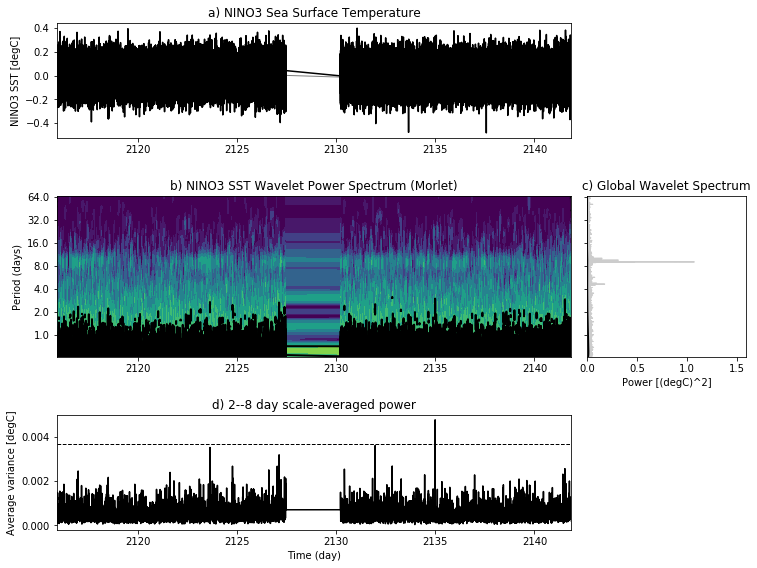

In [29]:

url = 'http://paos.colorado.edu/research/wavelets/wave_idl/nino3sst.txt'
dat = secF
title = 'NINO3 Sea Surface Temperature'
label = 'NINO3 SST'
units = 'degC'
t = secFt
N = dat.size
p = numpy.polyfit(t - t0, dat, 1)
dat_notrend = dat - numpy.polyval(p, t - t0)
std = dat_notrend.std()  # Standard deviation
var = std ** 2  # Variance
dat_norm = dat_notrend / std  # Normalized dataset
dt = 0.25
mother = wavelet.Morlet(6)
s0 = 2 * dt  # Starting scale, in this case 2 * 0.25 years = 6 months
dj = 1 / 24  # Twelve sub-octaves per octaves
J = 7 / dj  # Seven powers of two with dj sub-octaves
alpha, _, _ = wavelet.ar1(dat)  # Lag-1 autocorrelation for red noise

wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat_norm, dt, dj, s0, J,
                                                      mother)
iwave = wavelet.icwt(wave, scales, dt, dj, mother) * std

power = (numpy.abs(wave)) ** 2
fft_power = numpy.abs(fft) ** 2
period = 1 / freqs

power /= scales[:, None]

signif, fft_theor = wavelet.significance(1.0, dt, scales, 0, alpha,
                                         significance_level=0.95,
                                         wavelet=mother)
sig95 = numpy.ones([1, N]) * signif[:, None]
sig95 = power / sig95

glbl_power = power.mean(axis=1)
dof = N - scales  # Correction for padding at edges
glbl_signif, tmp = wavelet.significance(var, dt, scales, 1, alpha,
                                        significance_level=0.95, dof=dof,
                                        wavelet=mother)

sel = find((period >= 2) & (period < 8))
Cdelta = mother.cdelta
scale_avg = (scales * numpy.ones((N, 1))).transpose()
scale_avg = power / scale_avg  # As in Torrence and Compo (1998) equation 24
scale_avg = var * dj * dt / Cdelta * scale_avg[sel, :].sum(axis=0)
scale_avg_signif, tmp = wavelet.significance(var, dt, scales, 2, alpha,
                                             significance_level=0.95,
                                             dof=[scales[sel[0]],
                                                  scales[sel[-1]]],
                                             wavelet=mother)

# Prepare the figure
pyplot.close('all')
pyplot.ioff()
figprops = dict(figsize=(11, 8), dpi=72)
fig = pyplot.figure(**figprops)

# First sub-plot, the original time series anomaly and inverse wavelet
# transform.
ax = pyplot.axes([0.1, 0.75, 0.65, 0.2])
ax.plot(t, iwave, '-', linewidth=1, color=[0.5, 0.5, 0.5])
ax.plot(t, dat, 'k', linewidth=1.5)
ax.set_title('a) {}'.format(title))
ax.set_ylabel(r'{} [{}]'.format(label, units))

# Second sub-plot, the normalized wavelet power spectrum and significance
# level contour lines and cone of influece hatched area. Note that period
# scale is logarithmic.
bx = pyplot.axes([0.1, 0.37, 0.65, 0.28], sharex=ax)
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]
bx.contourf(t, numpy.log2(period), numpy.log2(power), numpy.log2(levels),
            extend='both', cmap=pyplot.cm.viridis)
extent = [t.min(), t.max(), 0, max(period)]
bx.contour(t, numpy.log2(period), sig95, [-99, 1], colors='k', linewidths=2,
           extent=extent)
bx.fill(numpy.concatenate([t, t[-1:] + dt, t[-1:] + dt,
                           t[:1] - dt, t[:1] - dt]),
        numpy.concatenate([numpy.log2(coi), [1e-9], numpy.log2(period[-1:]),
                           numpy.log2(period[-1:]), [1e-9]]),
        'k', alpha=0.3, hatch='x')
bx.set_title('b) {} Wavelet Power Spectrum ({})'.format(label, mother.name))
bx.set_ylabel('Period (days)')
#
Yticks = 2 ** numpy.arange(numpy.ceil(numpy.log2(period.min())),
                           numpy.ceil(numpy.log2(period.max())))
bx.set_yticks(numpy.log2(Yticks))
bx.set_yticklabels(Yticks)

# Third sub-plot, the global wavelet and Fourier power spectra and theoretical
# noise spectra. Note that period scale is logarithmic.
cx = pyplot.axes([0.77, 0.37, 0.2, 0.28], sharey=bx)
cx.plot(glbl_signif, numpy.log2(period), 'k--')
cx.plot(var * fft_theor, numpy.log2(period), '--', color='#cccccc')
cx.plot(var * fft_power, numpy.log2(1./fftfreqs), '-', color='#cccccc',
        linewidth=1.)
cx.plot(var * glbl_power, numpy.log2(period), 'k-', linewidth=1.5)
cx.set_title('c) Global Wavelet Spectrum')
cx.set_xlabel(r'Power [({})^2]'.format(units))
cx.set_xlim([0, glbl_power.max() + var])
cx.set_ylim(numpy.log2([period.min(), period.max()]))
cx.set_yticks(numpy.log2(Yticks))
cx.set_yticklabels(Yticks)
pyplot.setp(cx.get_yticklabels(), visible=False)

# Fourth sub-plot, the scale averaged wavelet spectrum.
dx = pyplot.axes([0.1, 0.07, 0.65, 0.2], sharex=ax)
dx.axhline(scale_avg_signif, color='k', linestyle='--', linewidth=1.)
dx.plot(t, scale_avg, 'k-', linewidth=1.5)
dx.set_title('d) {}--{} day scale-averaged power'.format(2, 8))
dx.set_xlabel('Time (day)')
dx.set_ylabel(r'Average variance [{}]'.format(units))
ax.set_xlim([t.min(), t.max()])

pyplot.show()

In [32]:
1/12

0.08333333333333333

In [31]:
freqs

array([1.93602662, 1.82736579, 1.72480363, 1.62799784, 1.53662535,
       1.45038119, 1.36897755, 1.29214274, 1.21962034, 1.15116831,
       1.0865582 , 1.02557438, 0.96801331, 0.9136829 , 0.86240182,
       0.81399892, 0.76831267, 0.7251906 , 0.68448878, 0.64607137,
       0.60981017, 0.57558416, 0.5432791 , 0.51278719, 0.48400665,
       0.45684145, 0.43120091, 0.40699946, 0.38415634, 0.3625953 ,
       0.34224439, 0.32303569, 0.30490509, 0.28779208, 0.27163955,
       0.25639359, 0.24200333, 0.22842072, 0.21560045, 0.20349973,
       0.19207817, 0.18129765, 0.17112219, 0.16151784, 0.15245254,
       0.14389604, 0.13581978, 0.1281968 , 0.12100166, 0.11421036,
       0.10780023, 0.10174987, 0.09603908, 0.09064882, 0.0855611 ,
       0.08075892, 0.07622627, 0.07194802, 0.06790989, 0.0640984 ,
       0.06050083, 0.05710518, 0.05390011, 0.05087493, 0.04801954,
       0.04532441, 0.04278055, 0.04037946, 0.03811314, 0.03597401,
       0.03395494, 0.0320492 , 0.03025042, 0.02855259, 0.02695

D:\conda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


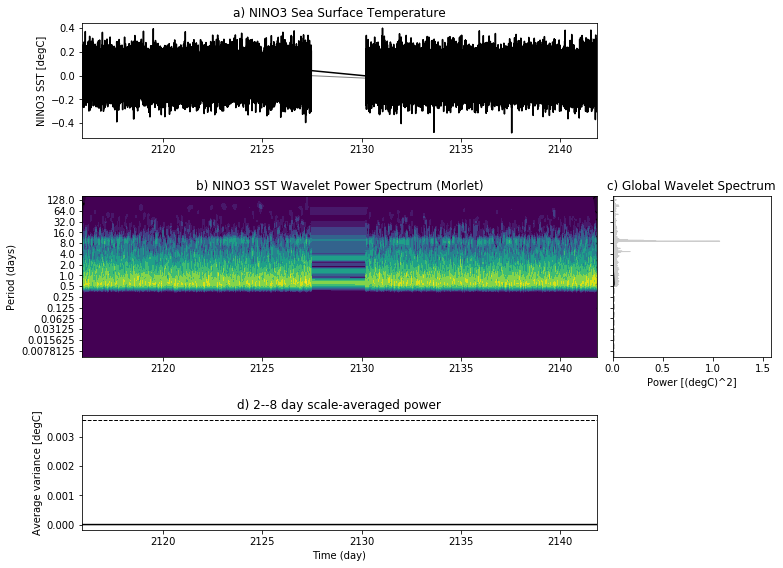

In [49]:

url = 'http://paos.colorado.edu/research/wavelets/wave_idl/nino3sst.txt'
dat = secF
title = 'NINO3 Sea Surface Temperature'
label = 'NINO3 SST'
units = 'degC'
t = secFt
N = dat.size
p = numpy.polyfit(t - t0, dat, 1)
dat_notrend = dat - numpy.polyval(p, t - t0)
std = dat_notrend.std()  # Standard deviation
var = std ** 2  # Variance
dat_norm = dat_notrend / std  # Normalized dataset
dt = 0.25
mother = wavelet.Morlet(6)
s0 = 1/200 # Starting scale, in this case 2 * 0.25 years = 6 months
dj = 1 / 12  # Twelve sub-octaves per octaves
J = 15 / dj  # Seven powers of two with dj sub-octaves
alpha, _, _ = wavelet.ar1(dat)  # Lag-1 autocorrelation for red noise

wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat_norm, dt, dj, s0, J,
                                                      mother)
iwave = wavelet.icwt(wave, scales, dt, dj, mother) * std

power = (numpy.abs(wave)) ** 2
fft_power = numpy.abs(fft) ** 2
period = 1 / freqs

power /= scales[:, None]

signif, fft_theor = wavelet.significance(1.0, dt, scales, 0, alpha,
                                         significance_level=0.95,
                                         wavelet=mother)
sig95 = numpy.ones([1, N]) * signif[:, None]
sig95 = power / sig95

glbl_power = power.mean(axis=1)
dof = N - scales  # Correction for padding at edges
glbl_signif, tmp = wavelet.significance(var, dt, scales, 1, alpha,
                                        significance_level=0.95, dof=dof,
                                        wavelet=mother)

sel = find((period >= 1/100) & (period < 1/200))
Cdelta = mother.cdelta
scale_avg = (scales * numpy.ones((N, 1))).transpose()
scale_avg = power / scale_avg  # As in Torrence and Compo (1998) equation 24
scale_avg = var * dj * dt / Cdelta * scale_avg[sel, :].sum(axis=0)


# Prepare the figure
pyplot.close('all')
pyplot.ioff()
figprops = dict(figsize=(11, 8), dpi=72)
fig = pyplot.figure(**figprops)

# First sub-plot, the original time series anomaly and inverse wavelet
# transform.
ax = pyplot.axes([0.1, 0.75, 0.65, 0.2])
ax.plot(t, iwave, '-', linewidth=1, color=[0.5, 0.5, 0.5])
ax.plot(t, dat, 'k', linewidth=1.5)
ax.set_title('a) {}'.format(title))
ax.set_ylabel(r'{} [{}]'.format(label, units))

# Second sub-plot, the normalized wavelet power spectrum and significance
# level contour lines and cone of influece hatched area. Note that period
# scale is logarithmic.
bx = pyplot.axes([0.1, 0.37, 0.65, 0.28], sharex=ax)
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]
bx.contourf(t, numpy.log2(period), numpy.log2(power), numpy.log2(levels),
            extend='both', cmap=pyplot.cm.viridis)
extent = [t.min(), t.max(), 0, max(period)]
bx.fill(numpy.concatenate([t, t[-1:] + dt, t[-1:] + dt,
                           t[:1] - dt, t[:1] - dt]),
        numpy.concatenate([numpy.log2(coi), [1e-9], numpy.log2(period[-1:]),
                           numpy.log2(period[-1:]), [1e-9]]),
        'k', alpha=0.3, hatch='x')
bx.set_title('b) {} Wavelet Power Spectrum ({})'.format(label, mother.name))
bx.set_ylabel('Period (days)')
#
Yticks = 2 ** numpy.arange(numpy.ceil(numpy.log2(period.min())),
                           numpy.ceil(numpy.log2(period.max())))
bx.set_yticks(numpy.log2(Yticks))
bx.set_yticklabels(Yticks)

# Third sub-plot, the global wavelet and Fourier power spectra and theoretical
# noise spectra. Note that period scale is logarithmic.
cx = pyplot.axes([0.77, 0.37, 0.2, 0.28], sharey=bx)
cx.plot(glbl_signif, numpy.log2(period), 'k--')
cx.plot(var * fft_theor, numpy.log2(period), '--', color='#cccccc')
cx.plot(var * fft_power, numpy.log2(1./fftfreqs), '-', color='#cccccc',
        linewidth=1.)
cx.plot(var * glbl_power, numpy.log2(period), 'k-', linewidth=1.5)
cx.set_title('c) Global Wavelet Spectrum')
cx.set_xlabel(r'Power [({})^2]'.format(units))
cx.set_xlim([0, glbl_power.max() + var])
cx.set_ylim(numpy.log2([period.min(), period.max()]))
cx.set_yticks(numpy.log2(Yticks))
cx.set_yticklabels(Yticks)
pyplot.setp(cx.get_yticklabels(), visible=False)

# Fourth sub-plot, the scale averaged wavelet spectrum.
dx = pyplot.axes([0.1, 0.07, 0.65, 0.2], sharex=ax)
dx.axhline(scale_avg_signif, color='k', linestyle='--', linewidth=1.)
dx.plot(t, scale_avg, 'k-', linewidth=1.5)
dx.set_title('d) {}--{} day scale-averaged power'.format(2, 8))
dx.set_xlabel('Time (day)')
dx.set_ylabel(r'Average variance [{}]'.format(units))
ax.set_xlim([t.min(), t.max()])

pyplot.show()

In [57]:
import pywt
def plot_wavelet(ax, time2, signal, scales, waveletname = 'cmor', 
                 cmap =plt.cm.seismic, title = '', ylabel = '', xlabel = ''):
    dt=time2
    coefficients, frequencies = pywt.cwt(signal, scales, waveletname, dt)

    power = (abs(coefficients)) ** 2
    period = frequencies
    levels = [0.015625,0.03125,0.0625, 0.125, 0.25, 0.5, 1]
    contourlevels = np.log2(levels) #original
    time=range(2048)

    im = ax.contourf(time, np.log2(period), np.log2(power), contourlevels, extend='both',cmap=cmap)


    ax.set_title(title, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=18)
    ax.set_xlabel(xlabel, fontsize=18)
    yticks = 2**np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))    
    ax.set_yticks(np.log2(yticks)) #original
    ax.set_yticklabels(yticks) #original
    ax.invert_yaxis()
    ylim = ax.get_ylim()

    cbar_ax = fig.add_axes([0.95, 0.5, 0.03, 0.25])
    fig.colorbar(im, cax=cbar_ax, orientation="vertical")

    return yticks, ylim


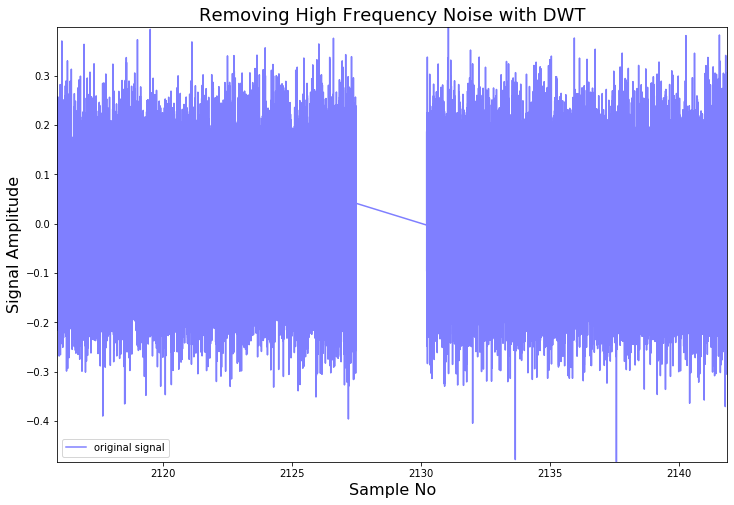

ValueError: operands could not be broadcast together with shapes (98,) (100210,) (98,) 

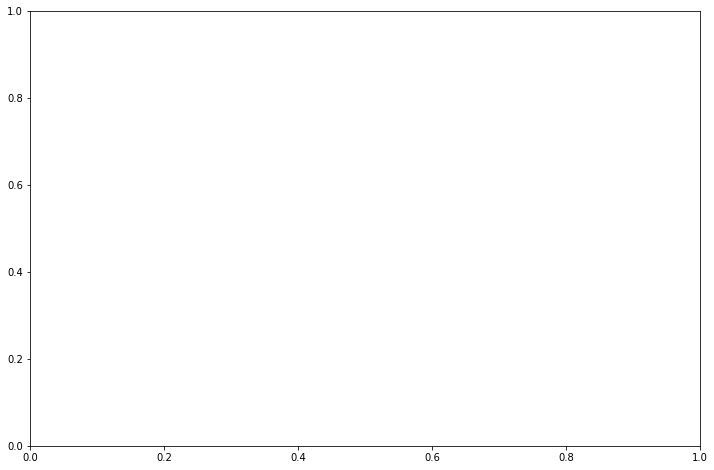

In [62]:
signal = secF
xrange = secFt
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(xrange,signal, color="b", alpha=0.5, label='original signal')
#rec = lowpassfilter(signal, 0.4)

ax.legend()
ax.set_title('Removing High Frequency Noise with DWT', fontsize=18)
ax.set_ylabel('Signal Amplitude', fontsize=16)
ax.set_xlabel('Sample No', fontsize=16)
plt.margins(0)
plt.show()


scale_range = np.arange(2, 100) # number of scales
fig, ax = plt.subplots(figsize=(12, 8))
plot_wavelet(ax=ax, time2=secFt, signal=signal, scales=scale_range,waveletname='cmor1.5-1.0',
             title = "CWT of Signal", ylabel = 'pass', xlabel = 'pass')
plt.show()


In [2]:
print('hh')

hh


In [4]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install obspy

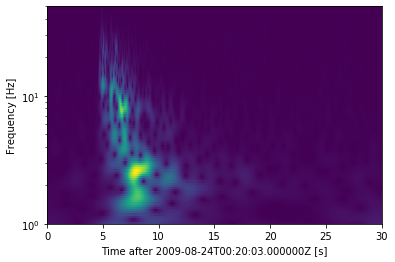

In [5]:
import numpy as np
import matplotlib.pyplot as plt

import obspy
from obspy.imaging.cm import obspy_sequential
from obspy.signal.tf_misfit import cwt


st = obspy.read()
tr = st[0]
npts = tr.stats.npts
dt = tr.stats.delta
t = np.linspace(0, dt * npts, npts)
f_min = 1
f_max = 50

scalogram = cwt(tr.data, dt, 8, f_min, f_max)

fig = plt.figure()
ax = fig.add_subplot(111)

x, y = np.meshgrid(
    t,
    np.logspace(np.log10(f_min), np.log10(f_max), scalogram.shape[0]))

ax.pcolormesh(x, y, np.abs(scalogram), cmap=obspy_sequential)
ax.set_xlabel("Time after %s [s]" % tr.stats.starttime)
ax.set_ylabel("Frequency [Hz]")
ax.set_yscale('log')
ax.set_ylim(f_min, f_max)
plt.show()

In [9]:
tr.data

array([ 0.        ,  0.00694644,  0.07597424, ...,  1.93449584,
        0.98196204,  0.44196924])

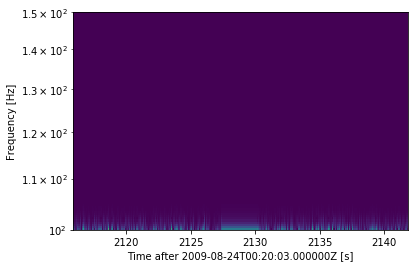

In [20]:
st = obspy.read()
tr = st[0]
npts = len(secF)
dt = 0.25
t = secFt
f_min = 100
f_max = 150

scalogram = cwt(secF, dt, 8, f_min, f_max)

fig = plt.figure()
ax = fig.add_subplot(111)

x, y = np.meshgrid(
    t,
    np.logspace(np.log10(f_min), np.log10(f_max), scalogram.shape[0]))

ax.pcolormesh(x, y, np.abs(scalogram), cmap=obspy_sequential)
ax.set_xlabel("Time after %s [s]" % tr.stats.starttime)
ax.set_ylabel("Frequency [Hz]")
ax.set_yscale('log')
ax.set_ylim(f_min, f_max)
plt.show()

In [5]:
len(secF)

100210

119.68910891089108


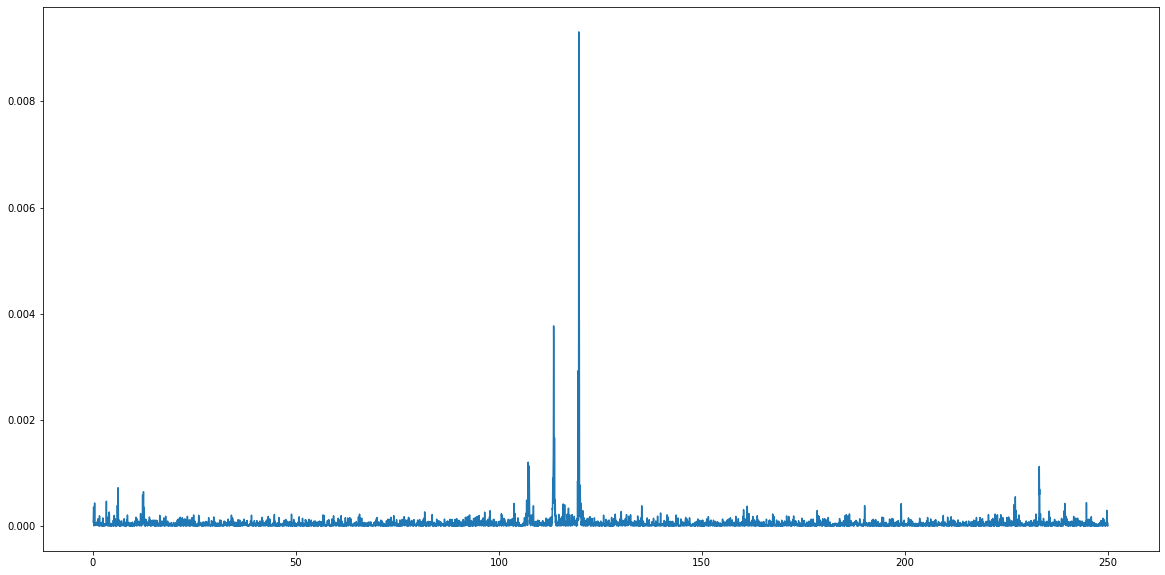

120.1139813981398


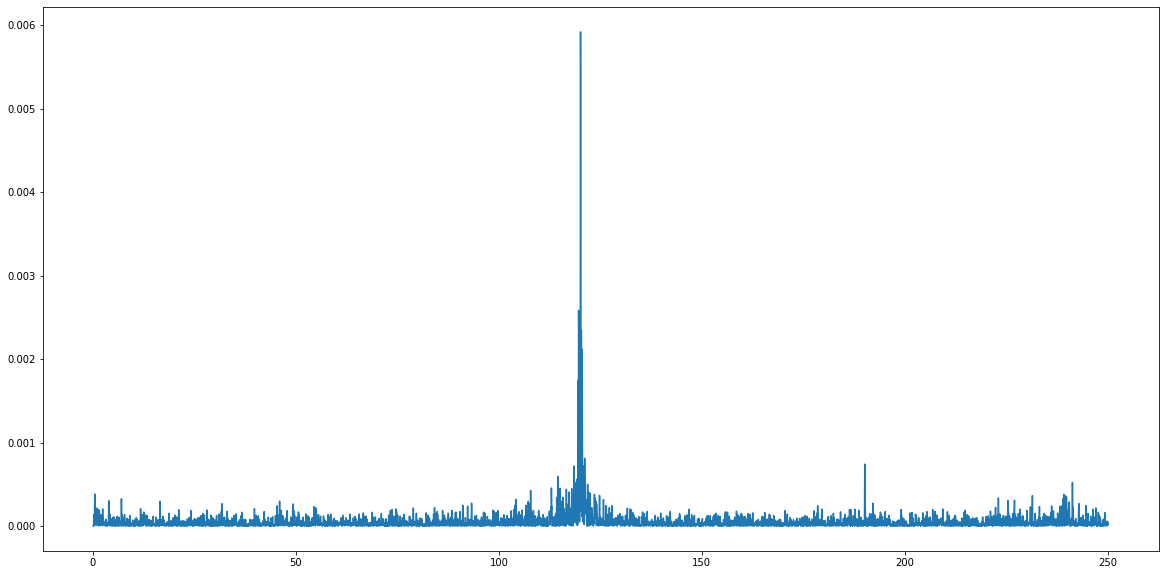

In [6]:
freq = np.linspace(0.1,250,10000)
powerPl = LombScargle(secFt[:50000],secF[:50000]).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,powerPl)
print(freq[np.argmax(powerPl)])
plt.show()
freq = np.linspace(0.1,250,10000)
powerPl = LombScargle(secFt[50000:],secF[50000:]).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,powerPl)
print(freq[np.argmax(powerPl)])

113.56594659465945


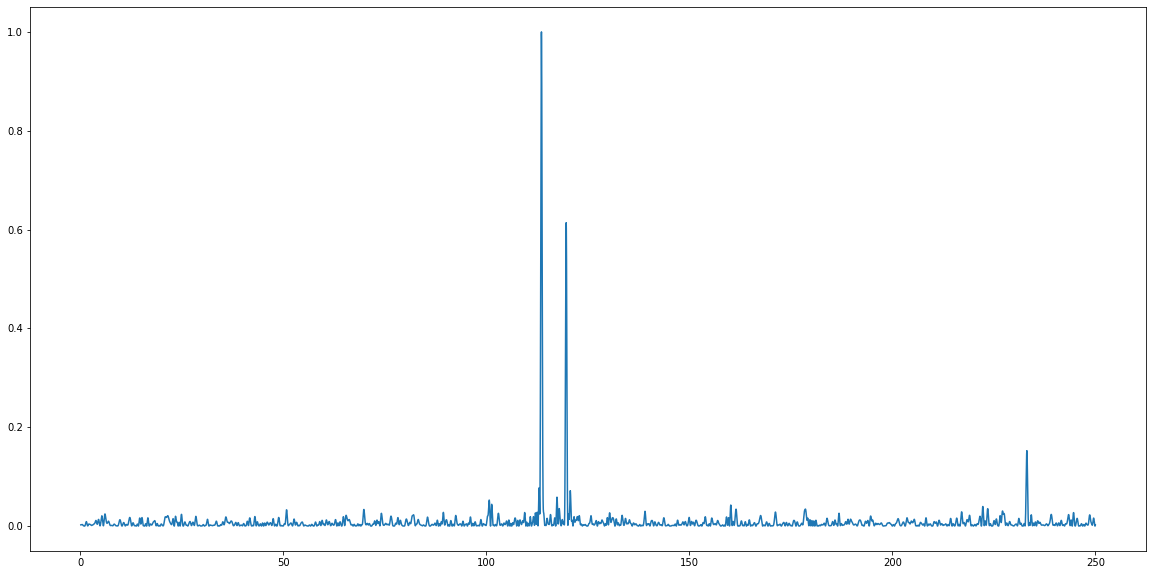

113.3160216021602


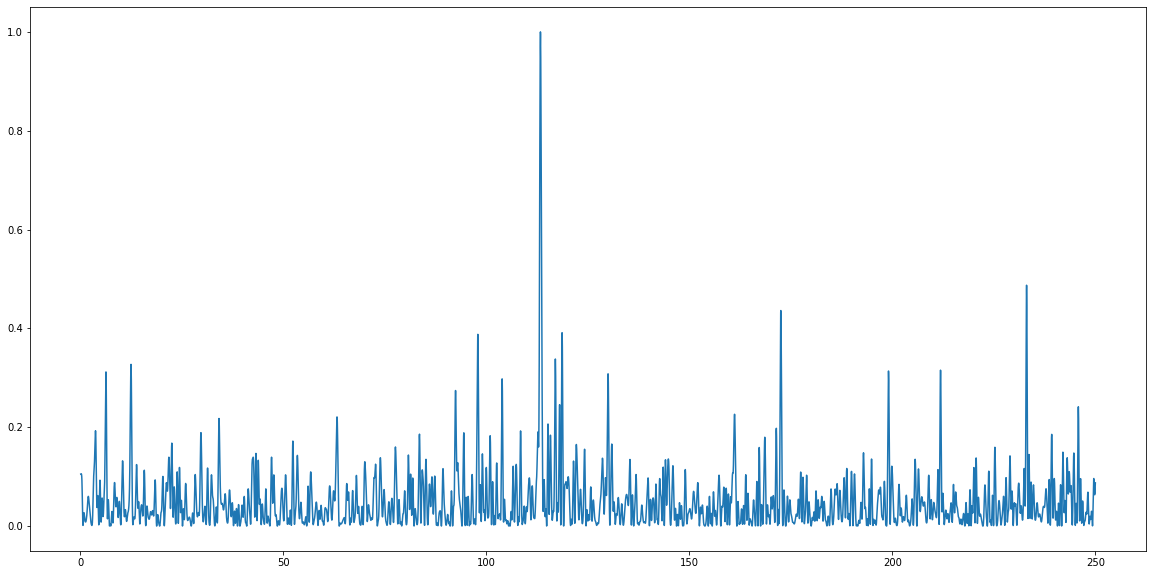

119.73909390939093


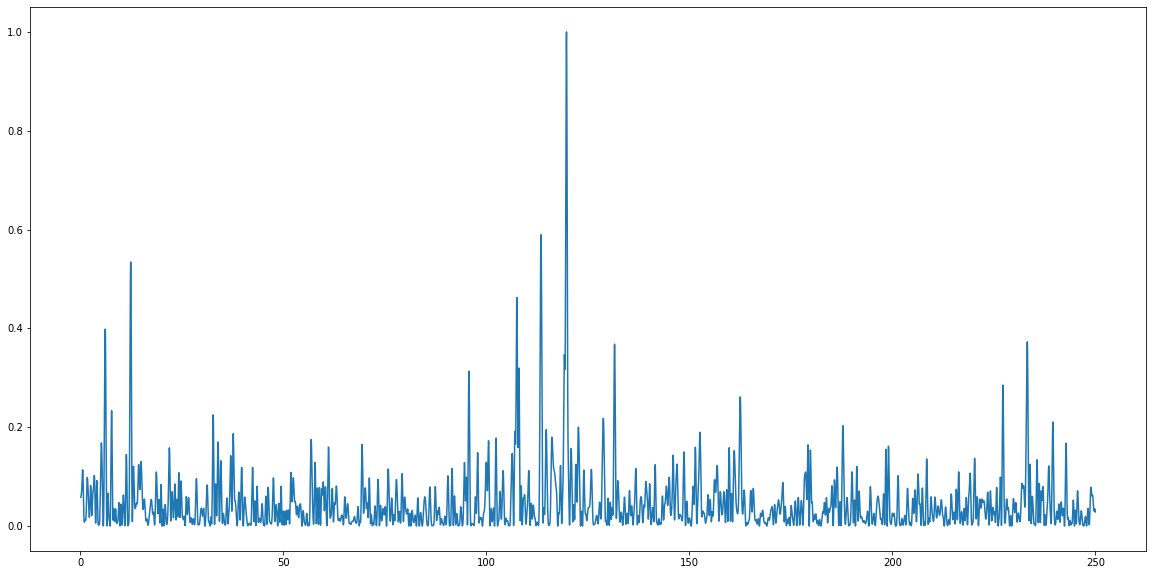

119.68910891089108


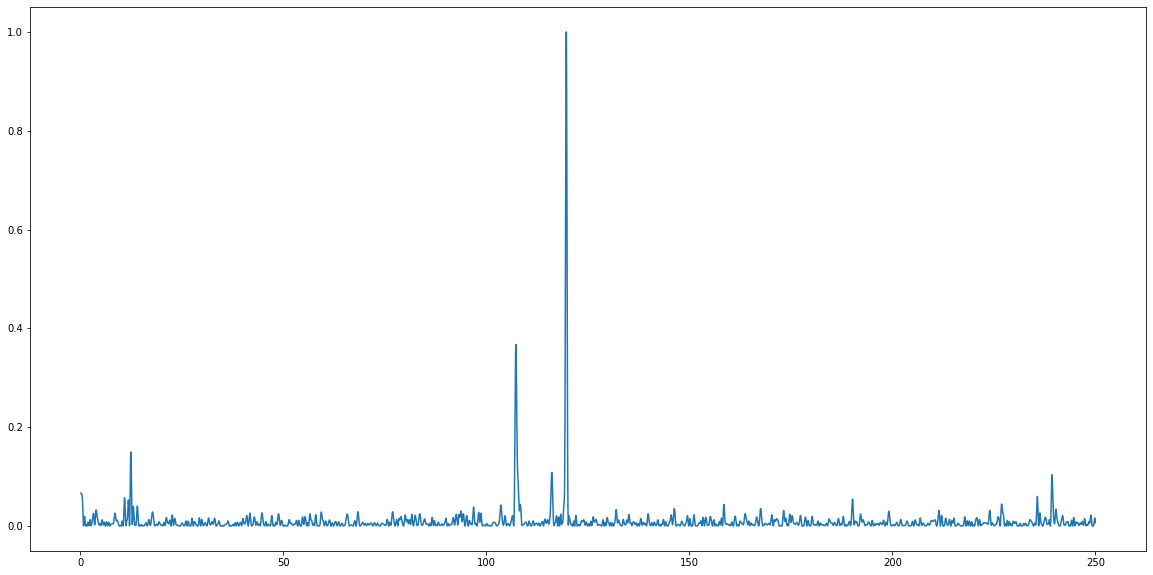

119.88904890489049


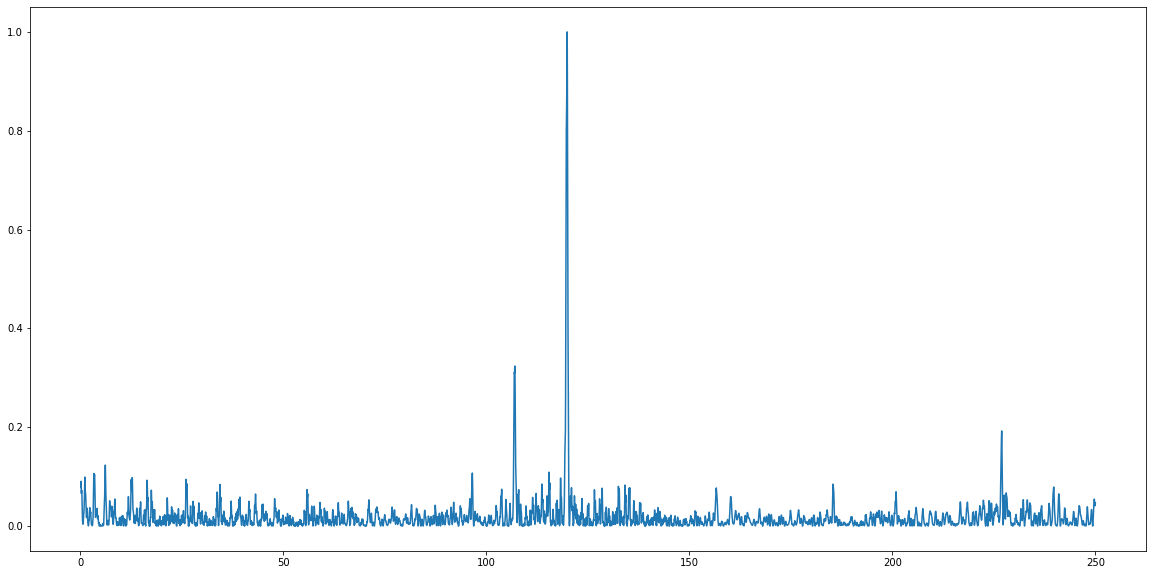

120.26393639363936


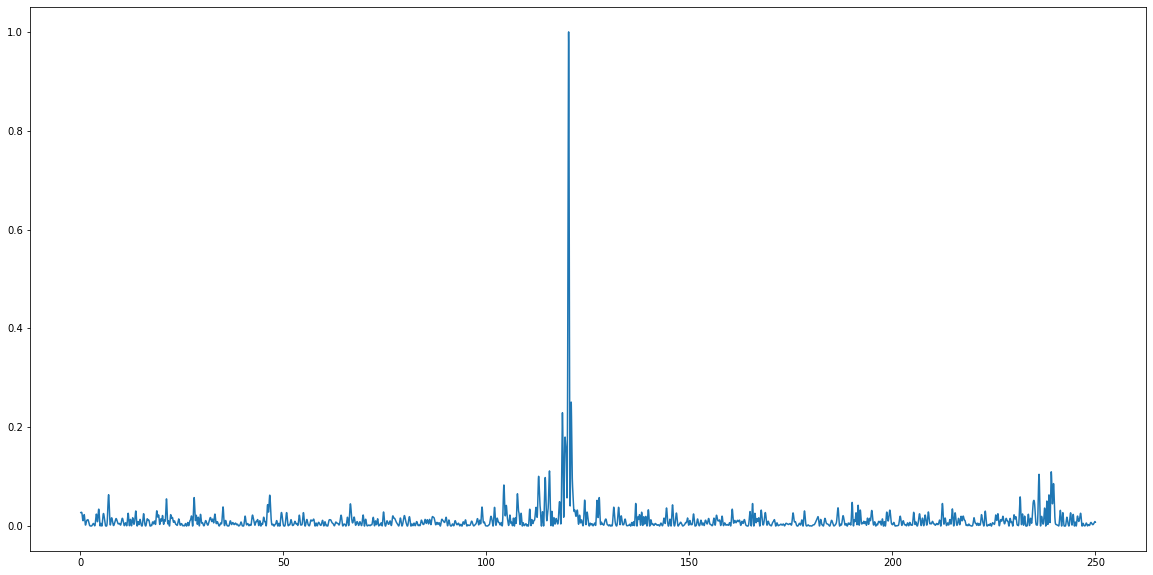

120.1139813981398


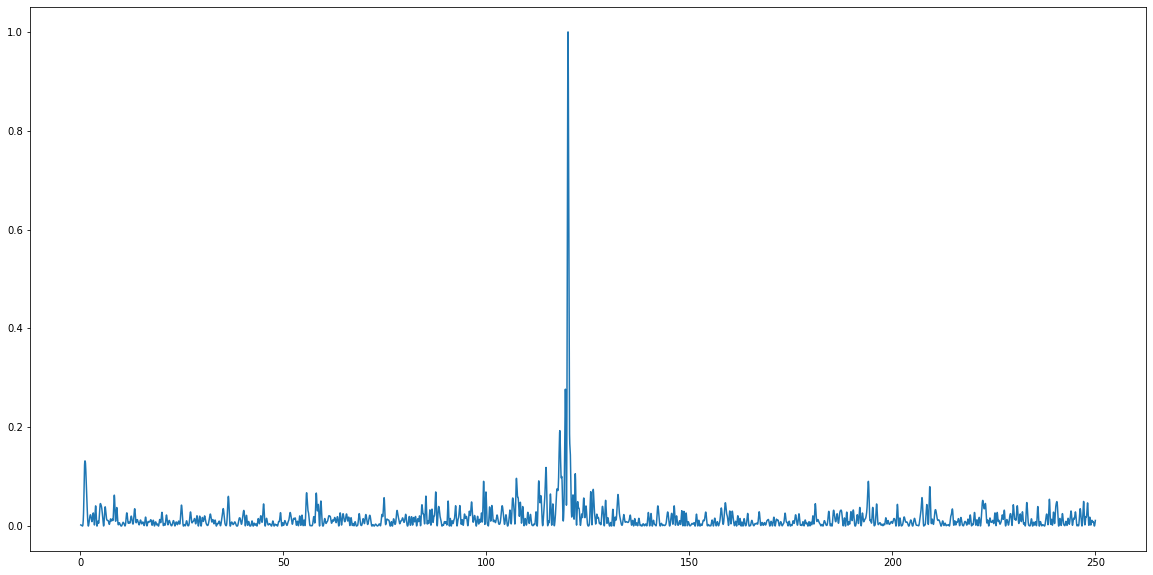

120.1139813981398


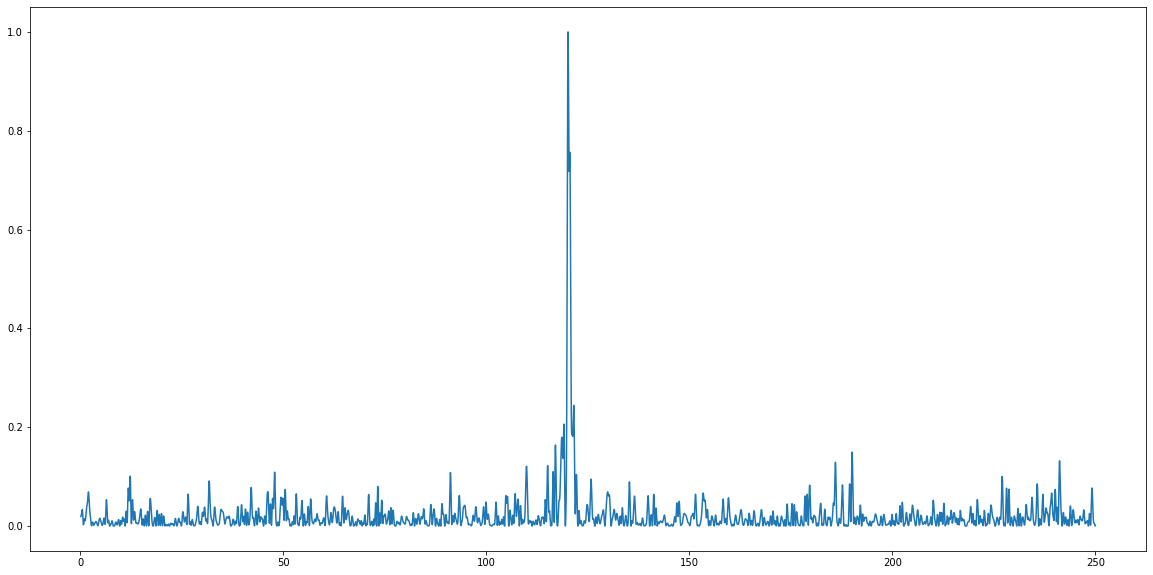

119.66411641164116


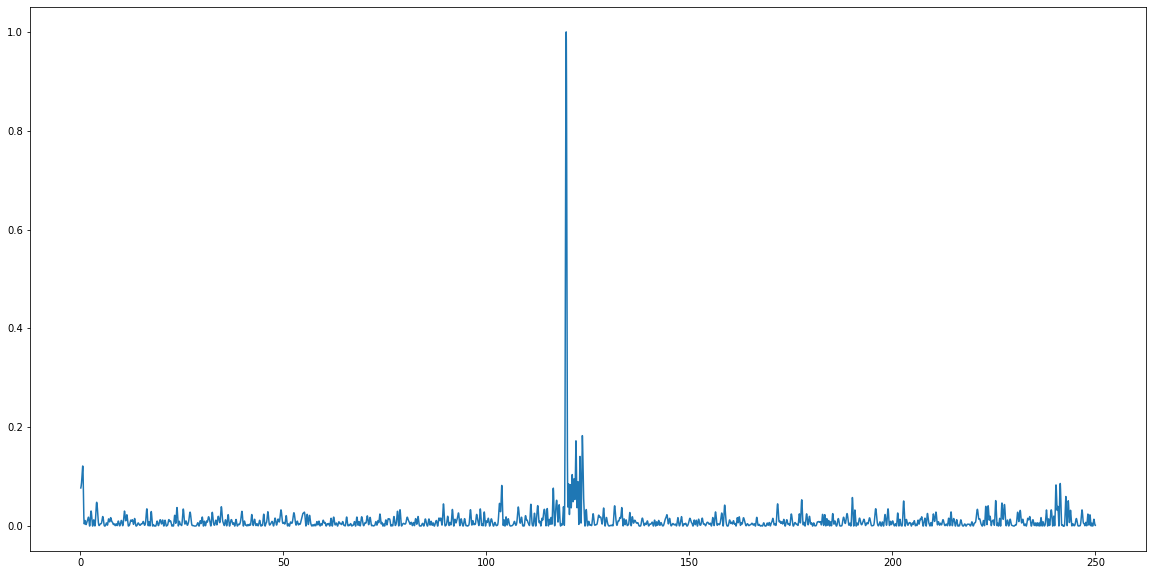

119.9140414041404


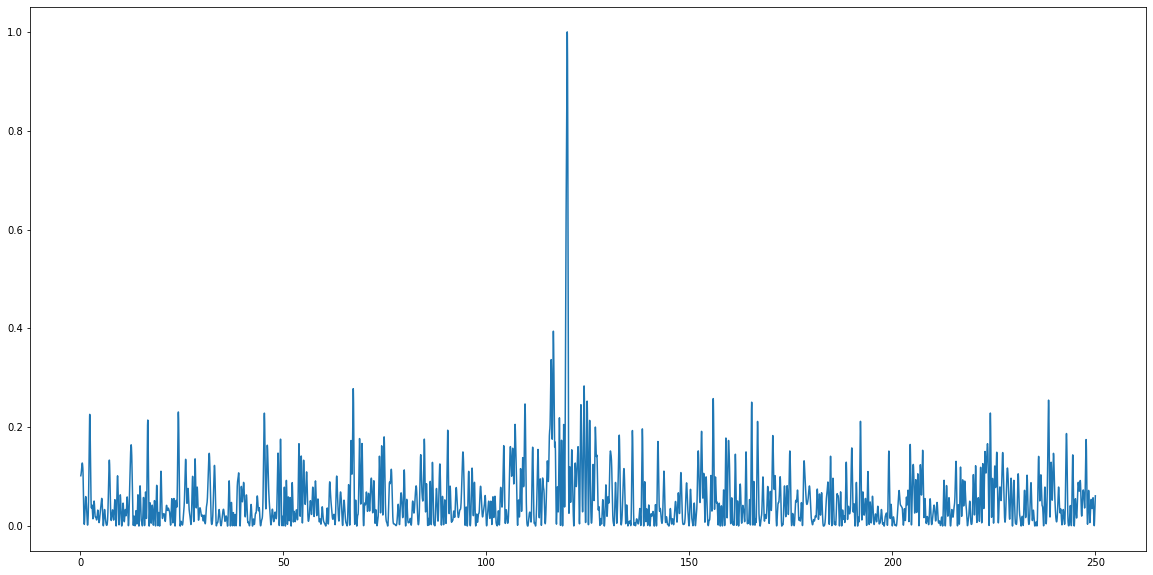

In [8]:
splitT = np.array_split(secFt, 10)
splitF = np.array_split(secF, 10)
stackedPower = []
for i in range(10):
    freq = np.linspace(0.1,250,10000)
    powerPl = LombScargle(splitT[i],splitF[i]).power(freq)
    plt.figure(figsize=(20,10))
    powerPl = powerPl/max(powerPl)
    plt.plot(freq,powerPl)
    print(freq[np.argmax(powerPl)])
    plt.show()
    if i == 0:
        stackedPower = powerPl
    else:
        stackedPower = np.vstack((stackedPower,powerPl))
    

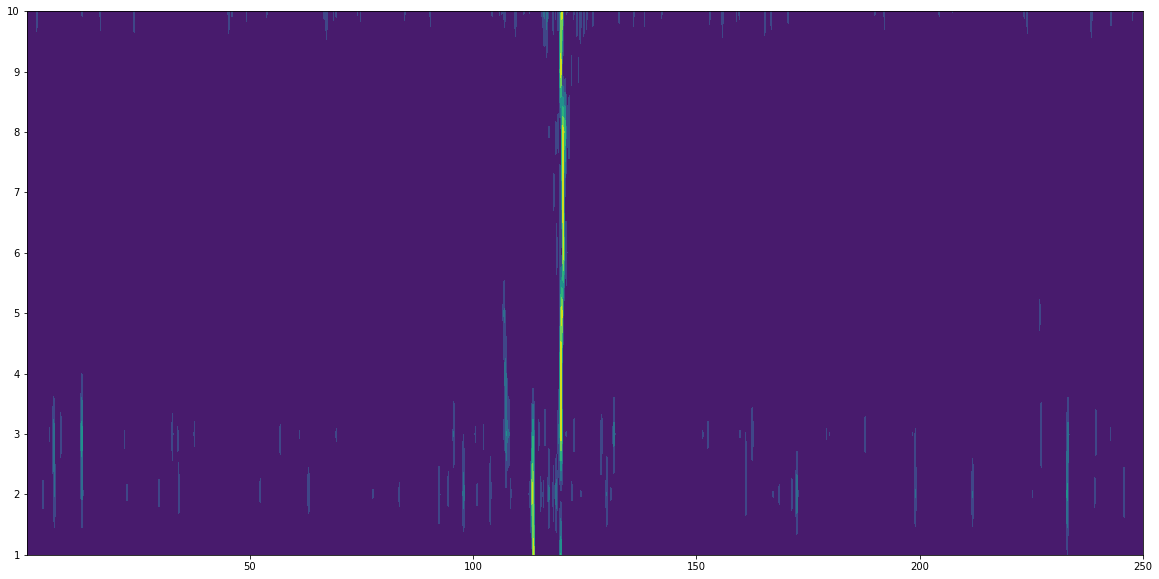

In [9]:
X,Y = np.meshgrid(freq, np.linspace(1,10,10))
plt.figure(figsize=(20,10))
plt.contourf(X,Y,stackedPower)
plt.savefig('GD1400Trail.pdf')

207.98760876087607


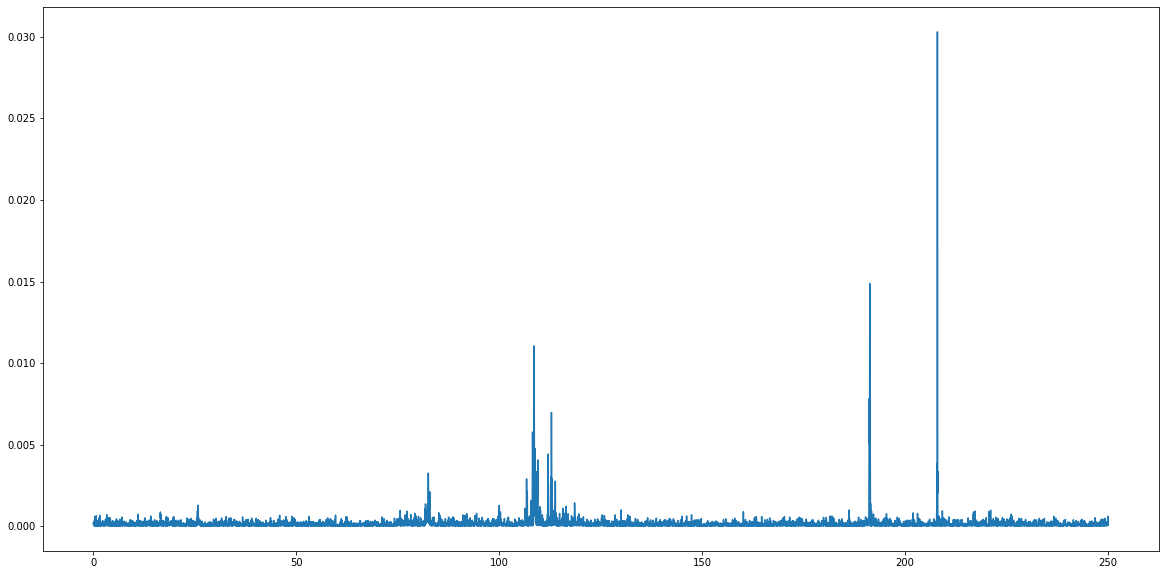

In [16]:
freq = np.linspace(0.1,250,10000)
powerPl = LombScargle(sec3t,sec3).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,powerPl)
print(freq[np.argmax(powerPl)])
plt.show()

108.31752175217521


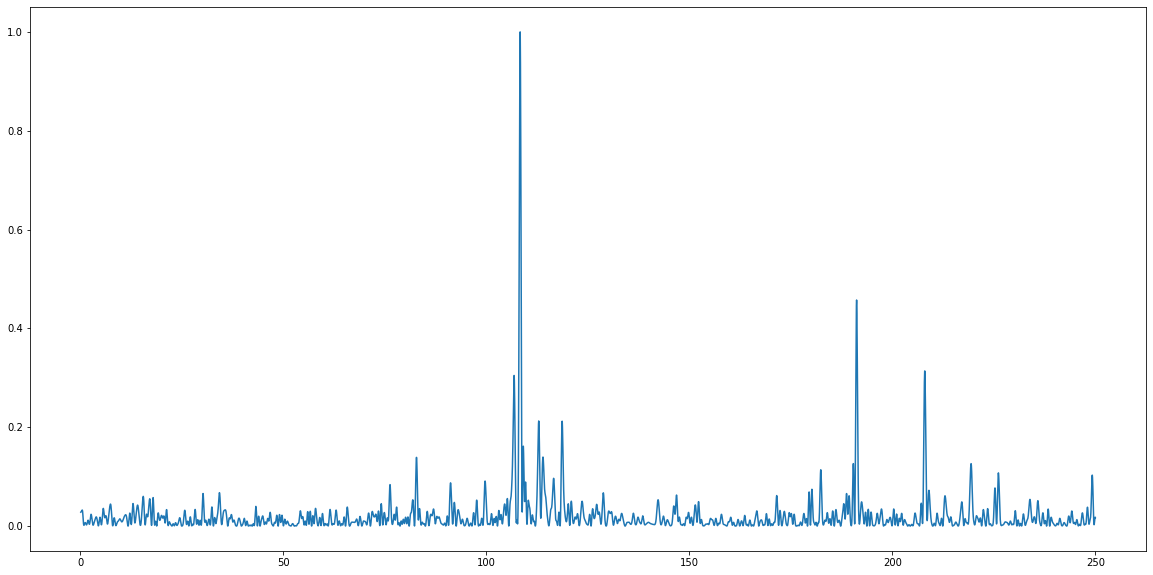

108.69240924092408


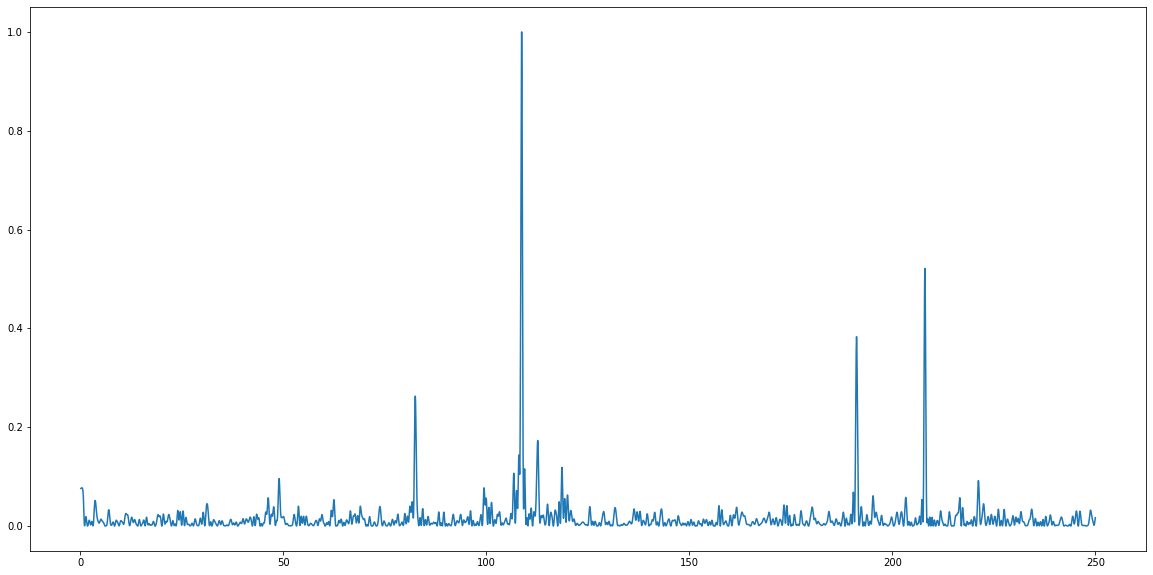

108.69240924092408


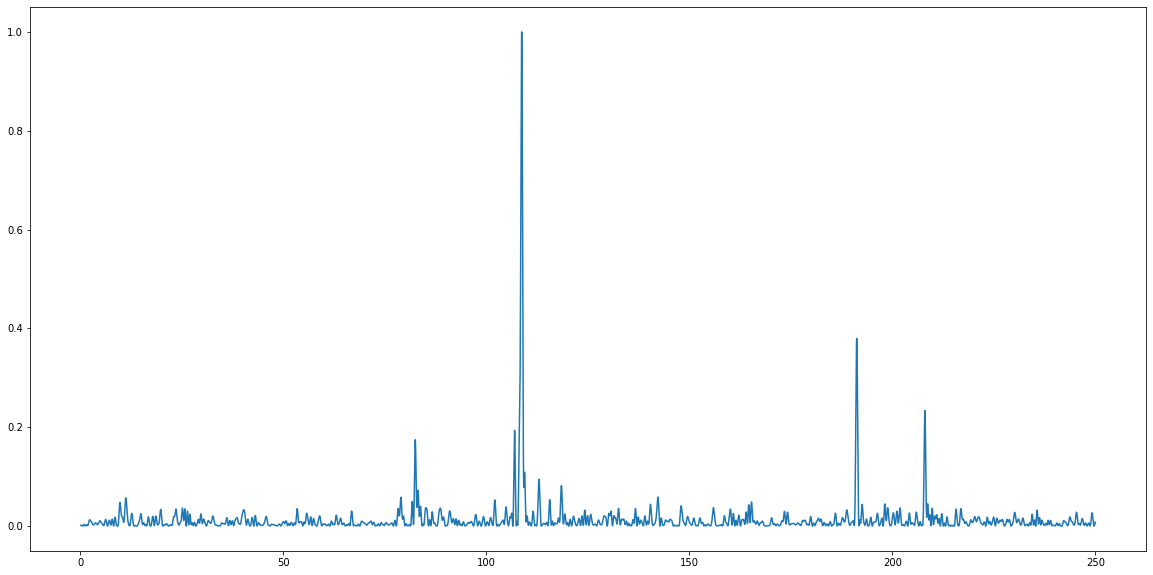

108.71740174017401


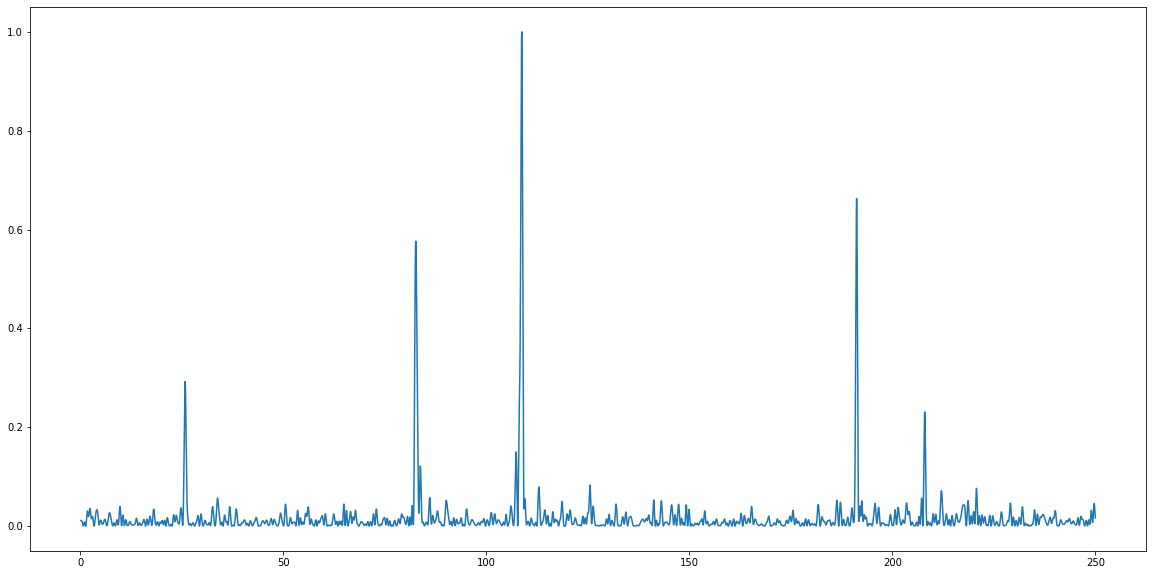

191.3176117611761


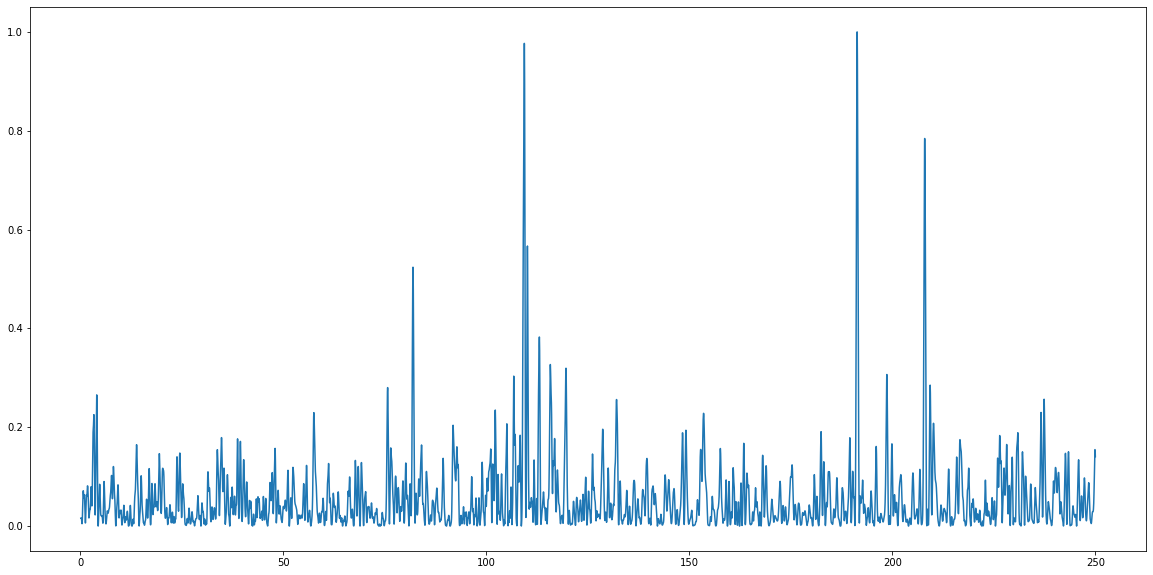

113.66591659165915


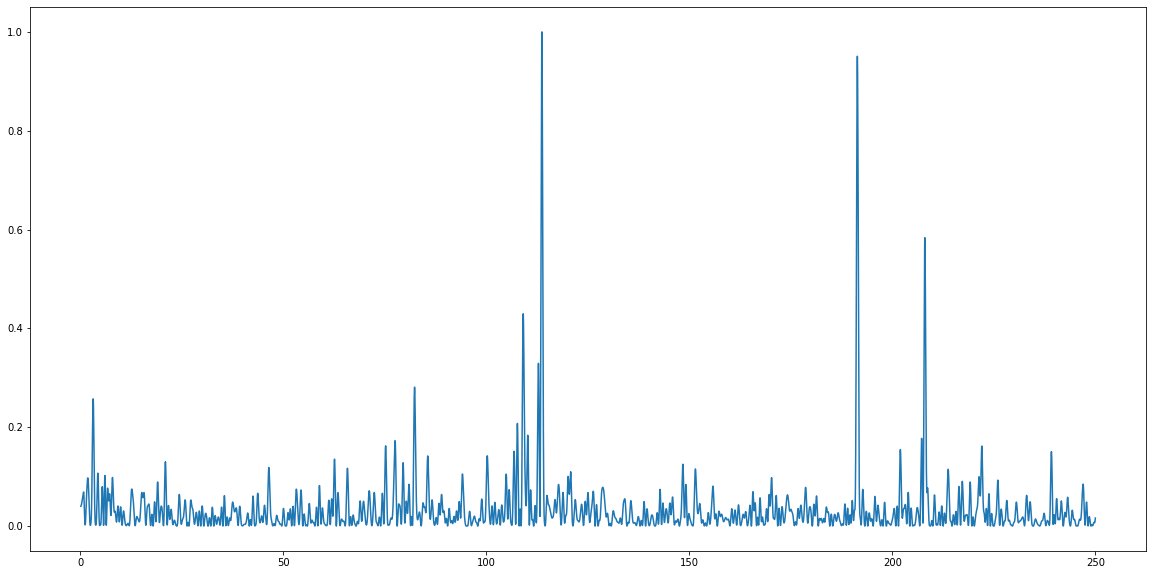

191.36759675967596


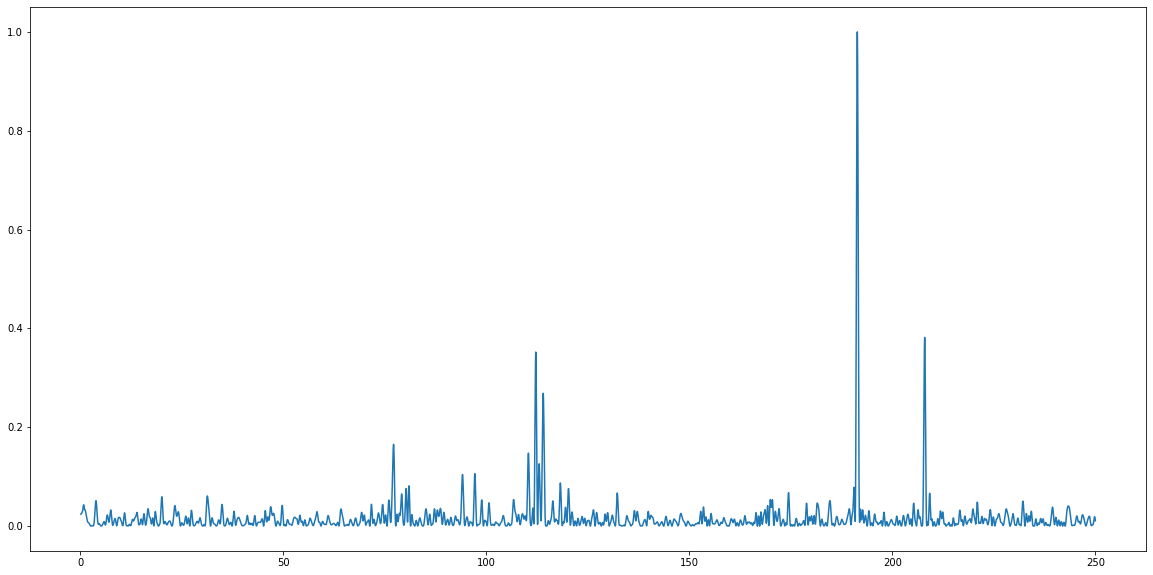

191.34260426042604


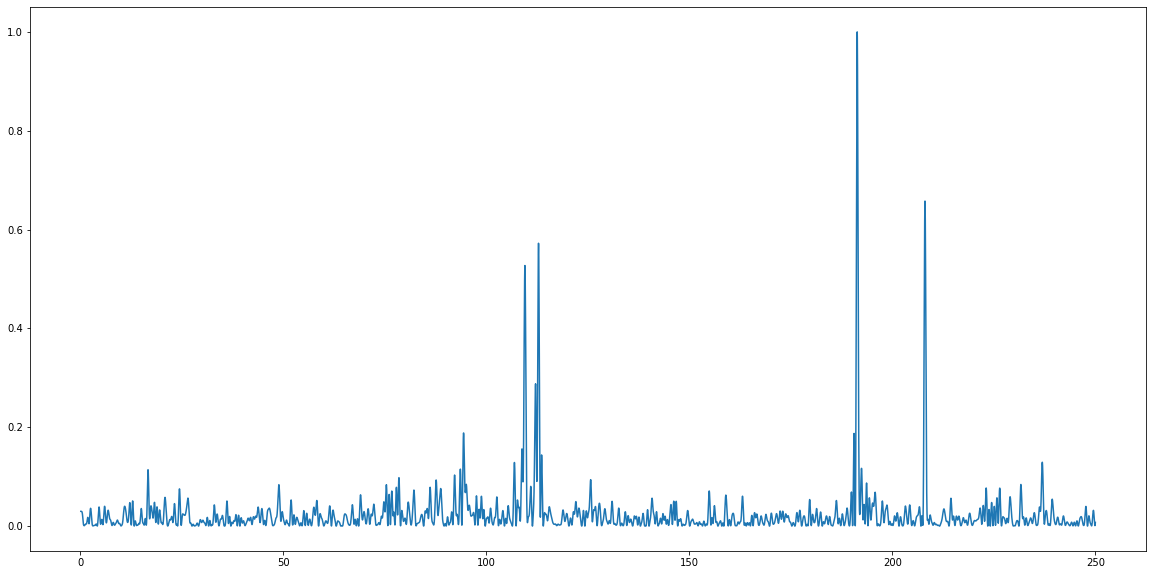

191.39258925892588


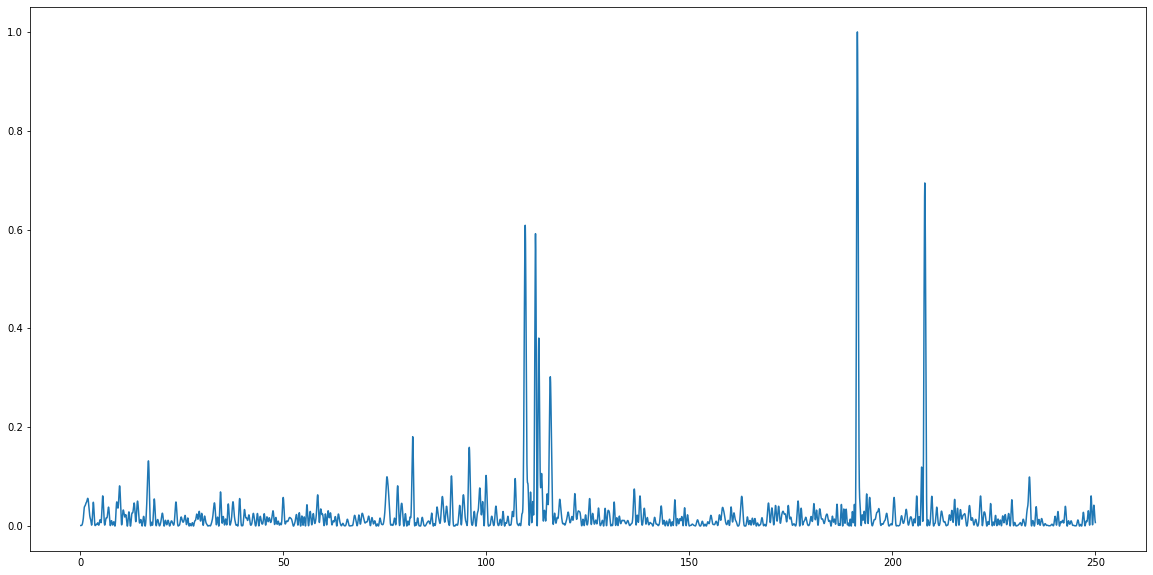

191.44257425742572


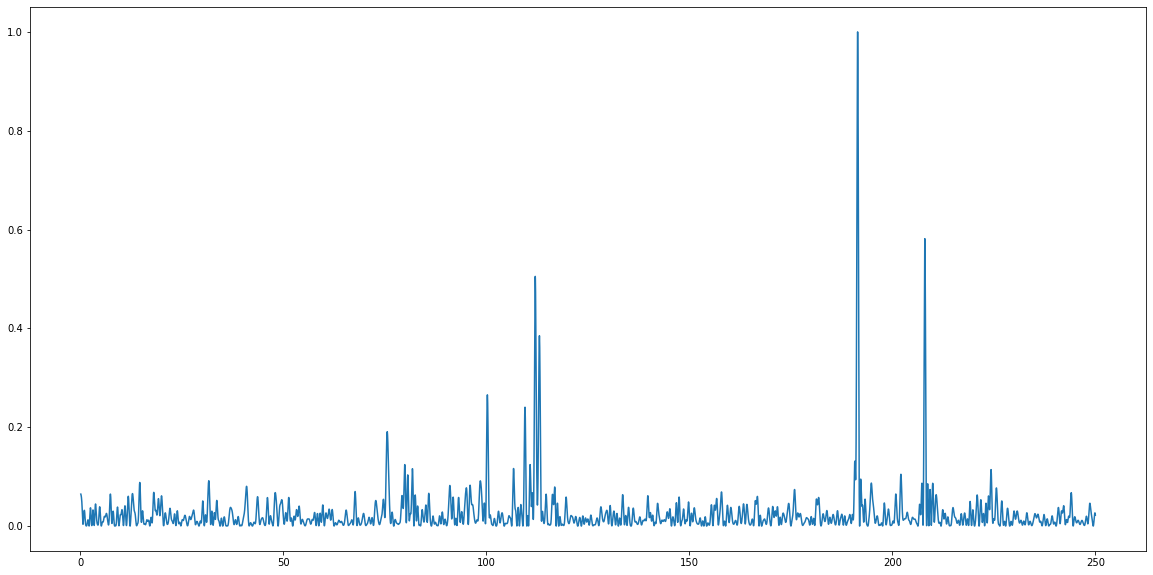

In [10]:
splitT = np.array_split(sec3t, 10)
splitF = np.array_split(sec3, 10)
stackedPower = []
for i in range(10):
    freq = np.linspace(0.1,250,10000)
    powerPl = LombScargle(splitT[i],splitF[i]).power(freq)
    plt.figure(figsize=(20,10))
    powerPl = powerPl/max(powerPl)
    plt.plot(freq,powerPl)
    print(freq[np.argmax(powerPl)])
    plt.show()
    if i == 0:
        stackedPower = powerPl
    else:
        stackedPower = np.vstack((stackedPower,powerPl))
    

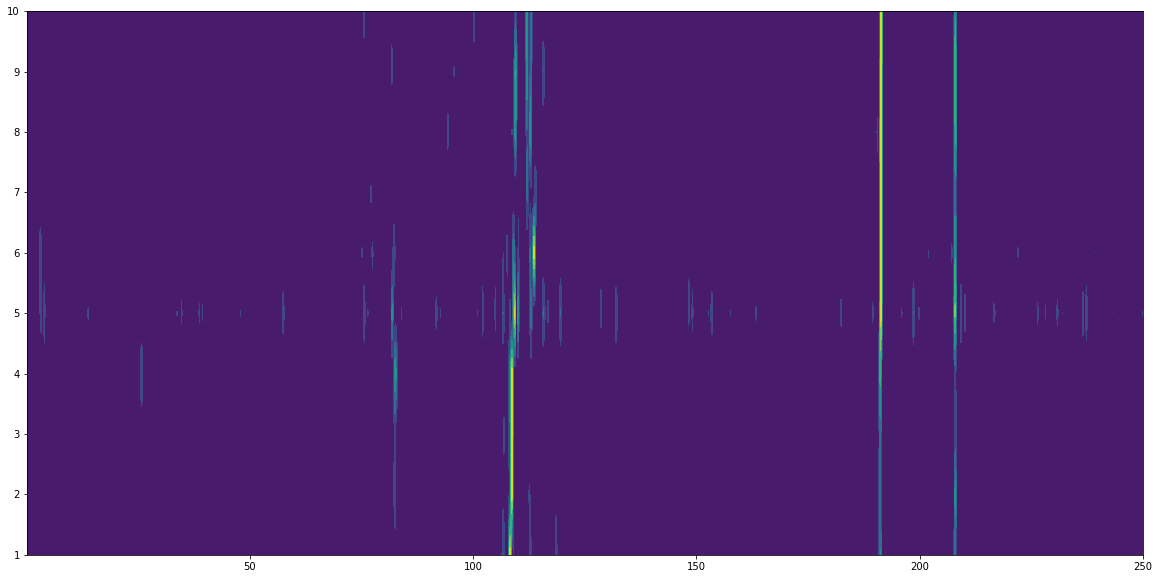

In [11]:
X,Y = np.meshgrid(freq, np.linspace(1,10,10))
plt.figure(figsize=(20,10))
plt.contourf(X,Y,stackedPower)
plt.savefig('GD1400TrailS.pdf')

In [ ]:
# pulsations from about 75 d^-1 to 450 d^-1
# can get total mass, luminosity and hydrogen fraction

#the pulsation amplitudes become increasingly variable as the ZZ Ceti stars evolve towards the
#red edge of the instability strip.

In [19]:
tessAllPhases = foldMeth(secFt, 0.4158)
sortIndi = np.argsort(tessAllPhases)
tessAllPhasesSorted = tessAllPhases[sortIndi]
secFtS = secFt[sortIndi]
secFS = secF[sortIndi]


In [16]:
find_nearest(tessAllPhasesSorted, 0.9)

90195

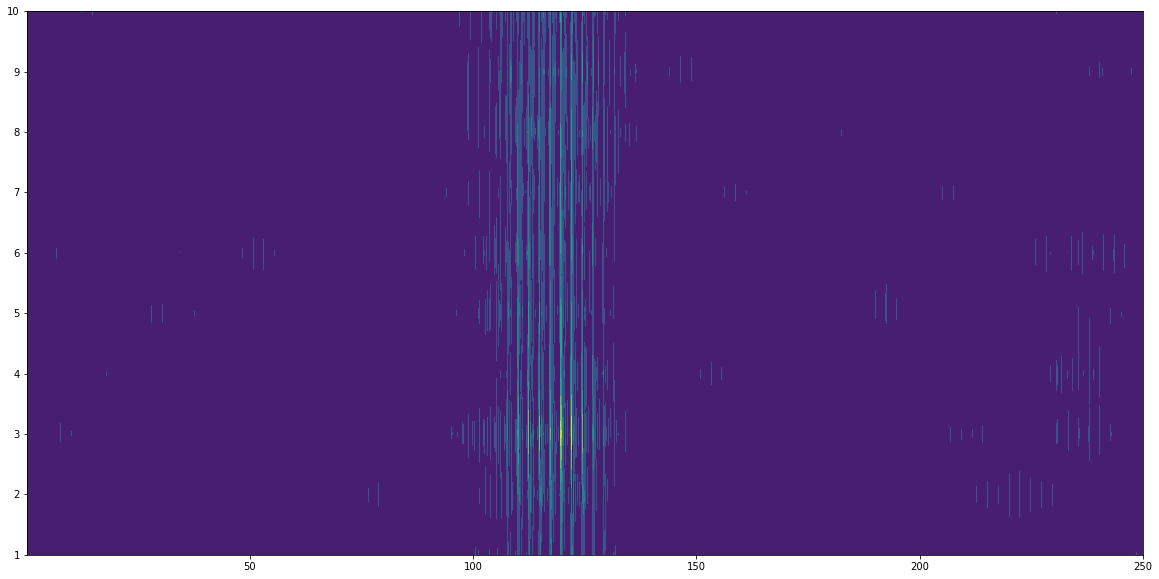

In [20]:
freq = np.linspace(0.1,250,10000)
powerPl = LombScargle(secFtS[:10057],secFS[:10057]).power(freq)
stackedPower = powerPl
powerPl = LombScargle(secFtS[10057:20160],secFS[10057:20160]).power(freq)
stackedPower = np.vstack((stackedPower,powerPl))

powerPl = LombScargle(secFtS[20160:30212],secFS[20160:30212]).power(freq)
stackedPower = np.vstack((stackedPower,powerPl))

powerPl = LombScargle(secFtS[30212:40273],secFS[30212:40273]).power(freq)
stackedPower = np.vstack((stackedPower,powerPl))

powerPl = LombScargle(secFtS[40273:50327],secFS[40273:50327]).power(freq)
stackedPower = np.vstack((stackedPower,powerPl))

powerPl = LombScargle(secFtS[50327:60303],secFS[50327:60303]).power(freq)
stackedPower = np.vstack((stackedPower,powerPl))

powerPl = LombScargle(secFtS[60303:70174],secFS[60303:70174]).power(freq)
stackedPower = np.vstack((stackedPower,powerPl))

powerPl = LombScargle(secFtS[70174:80151],secFS[70174:80151]).power(freq)
stackedPower = np.vstack((stackedPower,powerPl))

powerPl = LombScargle(secFtS[80151:90196],secFS[80151:90196]).power(freq)
stackedPower = np.vstack((stackedPower,powerPl))

powerPl = LombScargle(secFtS[90196:],secFS[90196:]).power(freq)
stackedPower = np.vstack((stackedPower,powerPl))



X,Y = np.meshgrid(freq, np.linspace(1,10,10))
plt.figure(figsize=(20,10))
plt.contourf(X,Y,stackedPower)
#plt.savefig('GD1400TrailS.pdf')

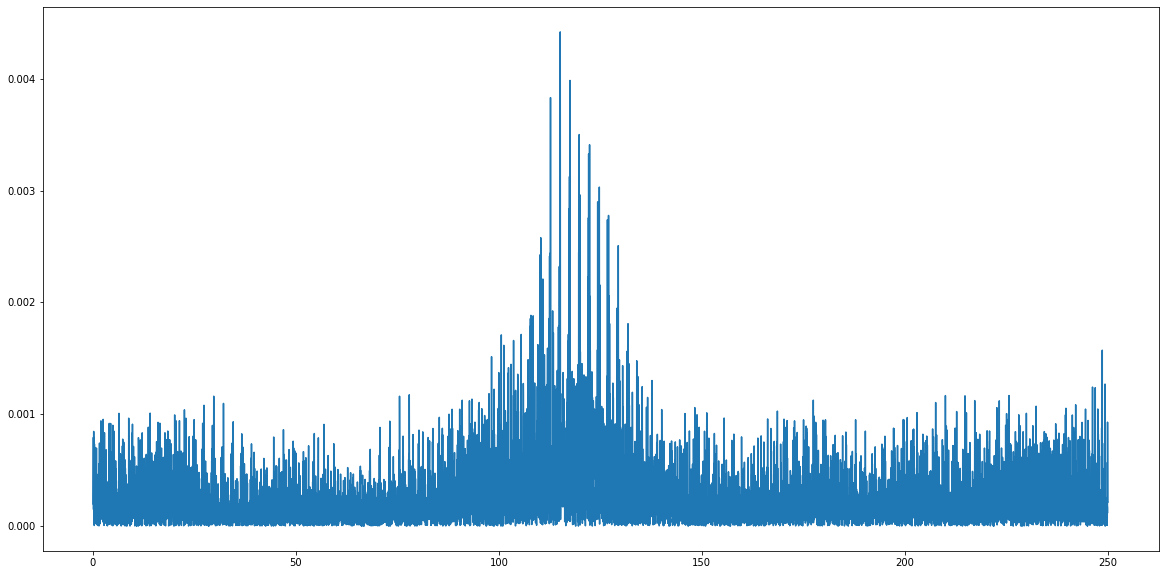

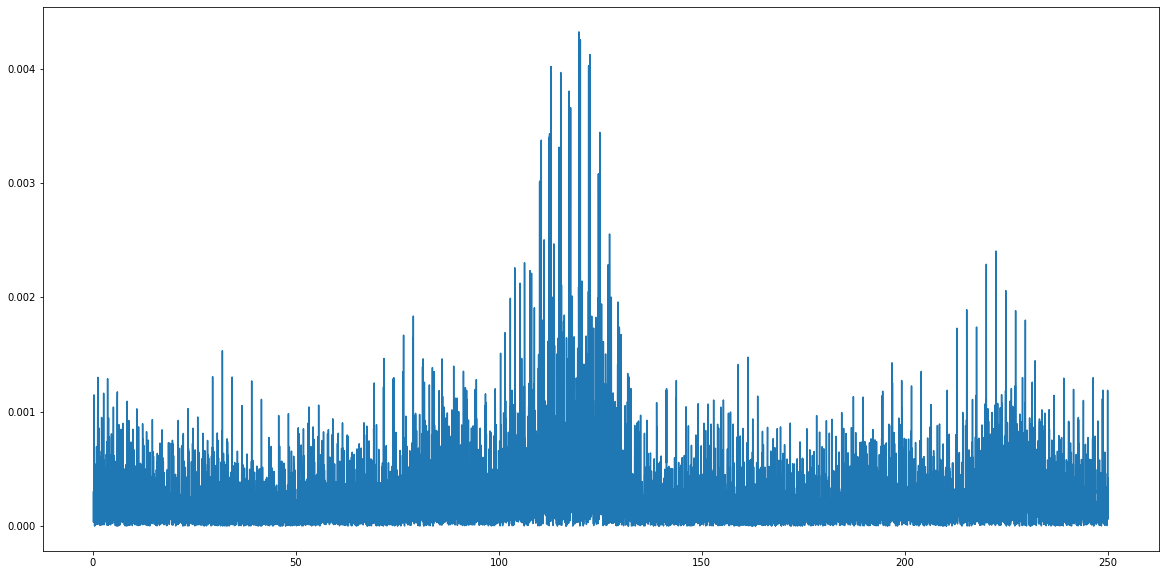

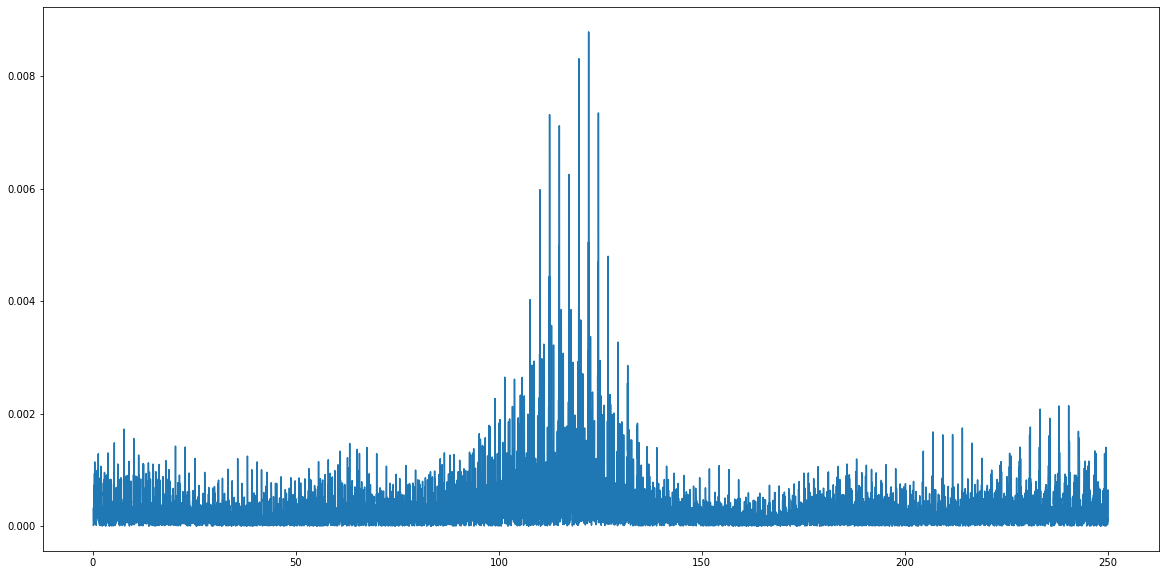

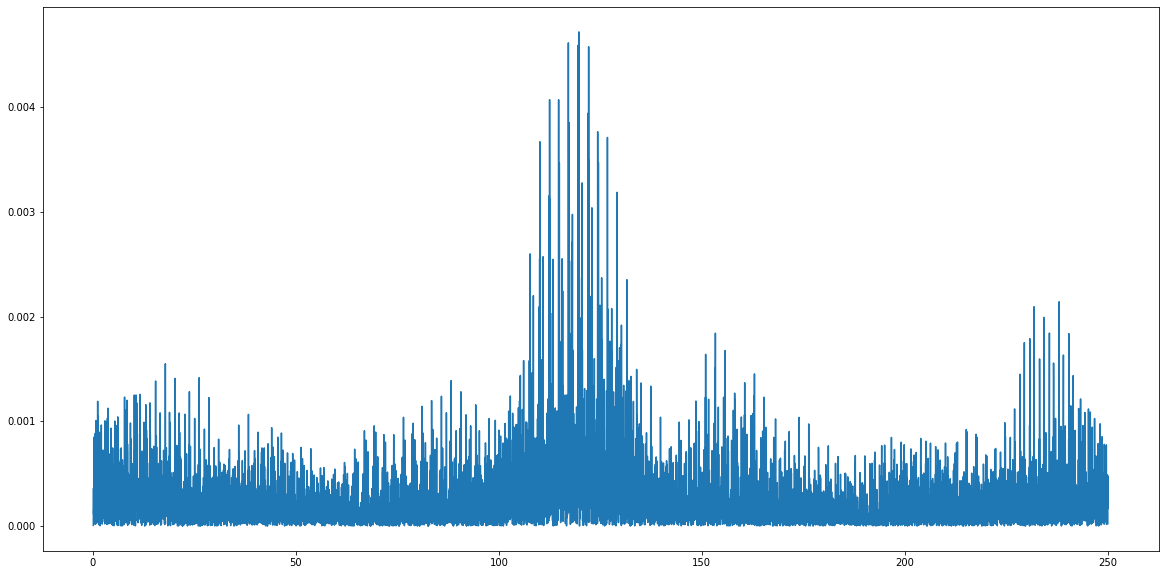

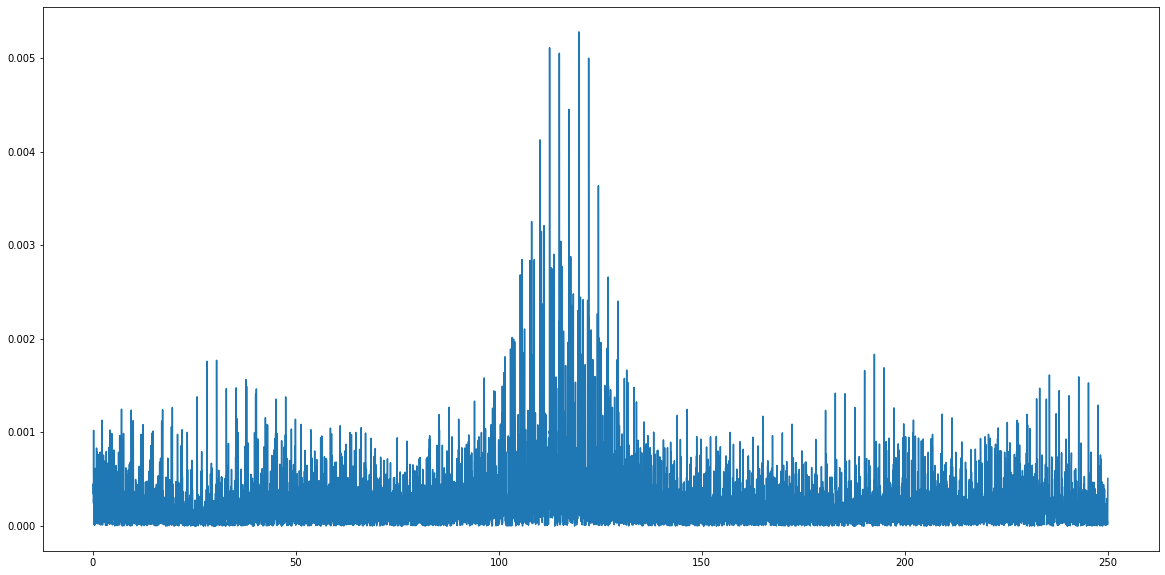

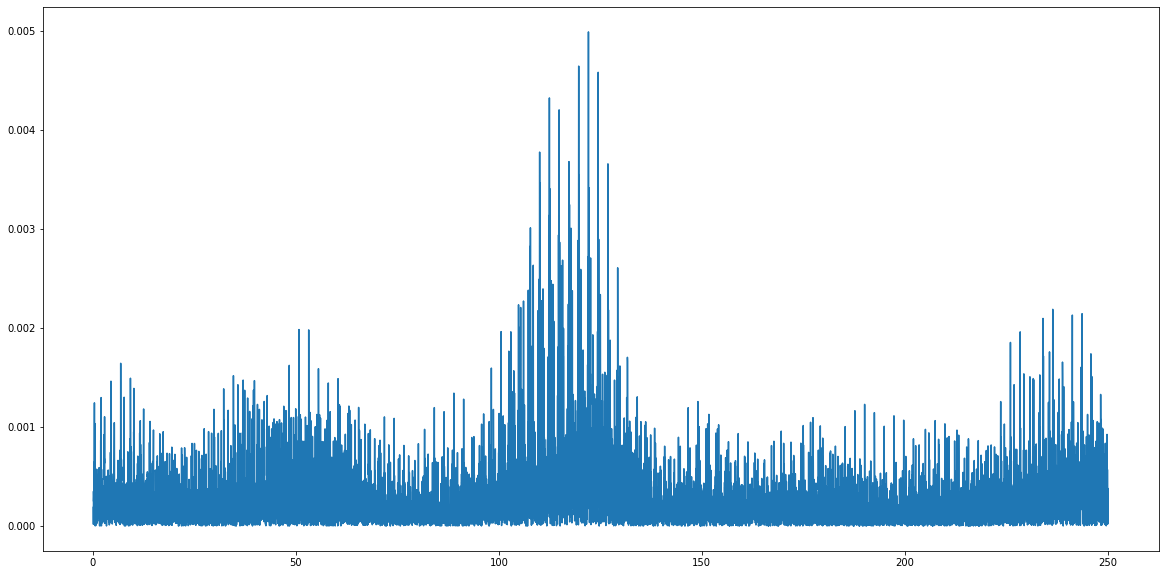

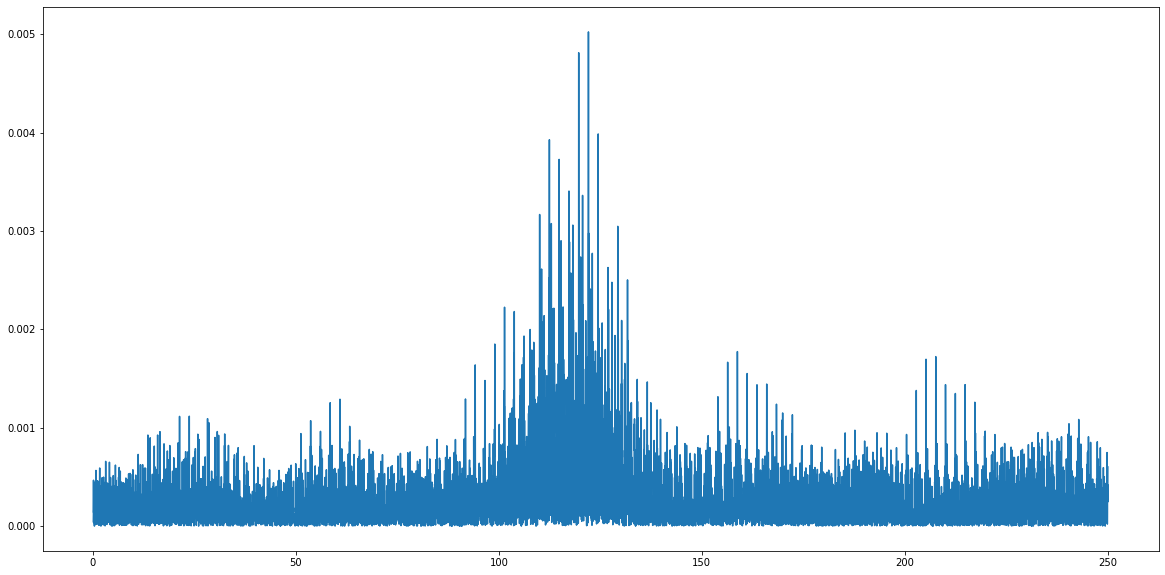

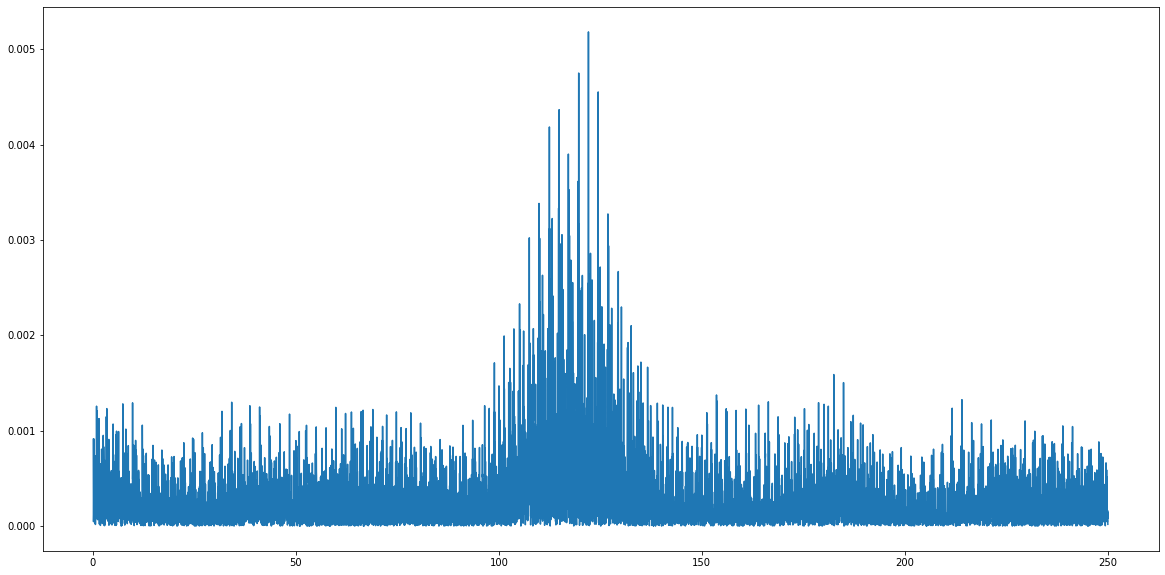

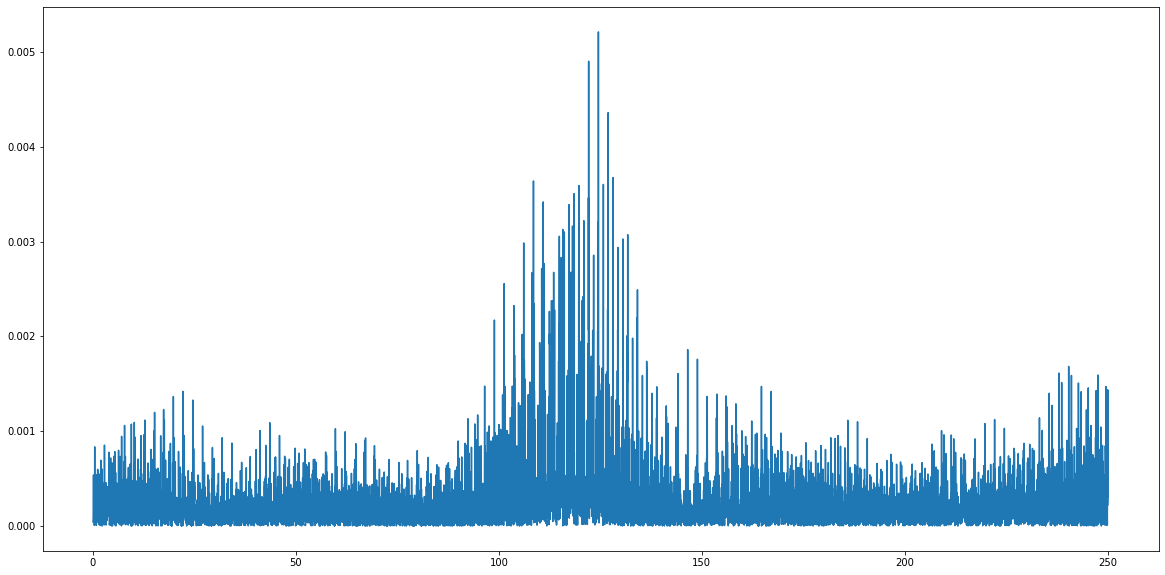

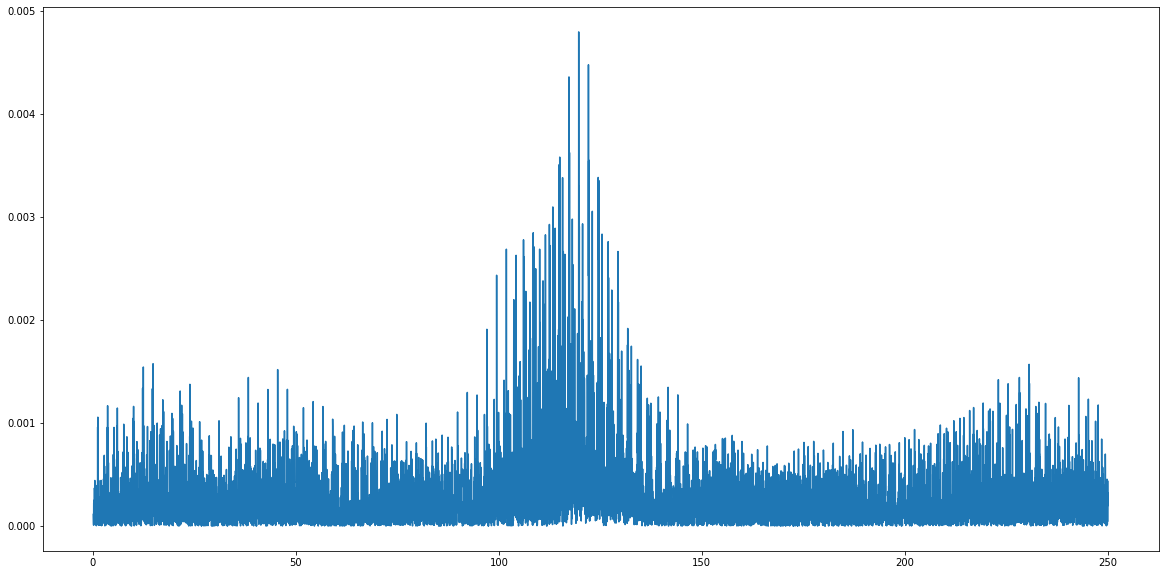

In [21]:
for i in range(10):
    plt.figure(figsize=(20,10))
    plt.plot(freq,stackedPower[i])
    plt.show()

In [2]:
hdul = fits.open('PG0010TESS.fits')
hdr = hdul[1].header
print(repr(hdr)) 
hdul.close()

XTENSION= 'BINTABLE'           / marks the beginning of a new HDU               
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  100 / length of first array dimension                
NAXIS2  =                18012 / length of second array dimension               
PCOUNT  =                    0 / group parameter count (not used)               
GCOUNT  =                    1 / group count (not used)                         
TFIELDS =                   20 / number of table fields                         
TTYPE1  = 'TIME    '           / column title: data time stamps                 
TFORM1  = 'D       '           / column format: 64-bit floating point           
TUNIT1  = 'BJD - 2457000, days' / column units: Barycenter corrected TESS Julian
TDISP1  = 'D14.7   '           / column display format                          
TTYPE2  = 'TIMECORR'        

In [3]:
hdul = fits.open('PG0010TESS1.fits')
hdr = hdul[1].header
print(repr(hdr)) 
hdul.close()

XTENSION= 'BINTABLE'           / marks the beginning of a new HDU               
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  100 / length of first array dimension                
NAXIS2  =                18012 / length of second array dimension               
PCOUNT  =                    0 / group parameter count (not used)               
GCOUNT  =                    1 / group count (not used)                         
TFIELDS =                   20 / number of table fields                         
TTYPE1  = 'TIME    '           / column title: data time stamps                 
TFORM1  = 'D       '           / column format: 64-bit floating point           
TUNIT1  = 'BJD - 2457000, days' / column units: Barycenter corrected TESS Julian
TDISP1  = 'D14.7   '           / column display format                          
TTYPE2  = 'TIMECORR'        

gzip was not found on your system! You should solve this issue for astroquery.eso to be at its best!
On POSIX system: make sure gzip is installed and in your path!On Windows: same for 7-zip (http://www.7-zip.org)!


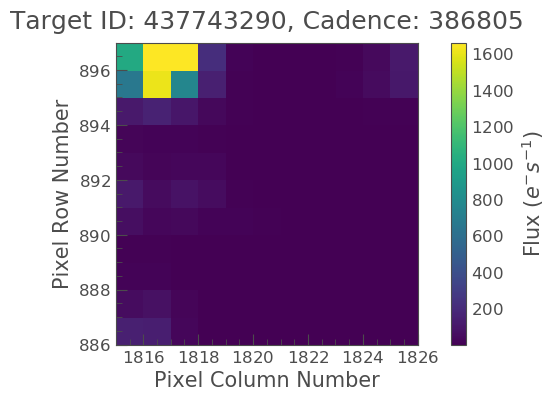

In [4]:
pixels = lk.search_targetpixelfile("PG 0010+281").download()
pixels.plot()


D:\conda\lib\site-packages\lightkurve\search.py:233: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning)


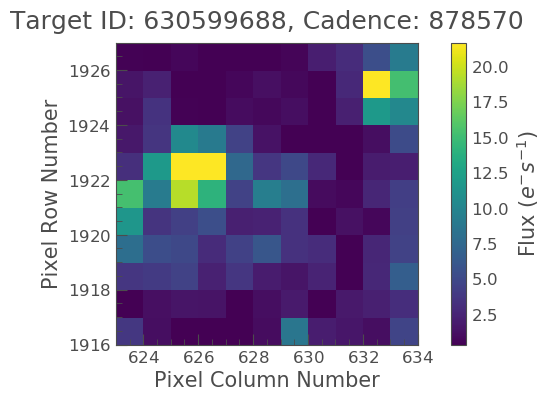

In [5]:
pixels = lk.search_targetpixelfile("NLTT5306").download()
pixels.plot()
